In [1]:
from google.colab import drive
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/Colab Notebooks/likelion_proj_finalproj'

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing

In [3]:
news1= pd.read_csv(f'{base_path}/2020.01.01_2020.12.31_1.csv')
news2 = pd.read_csv(f'{base_path}/2021.01.01_2021.12.31_1.csv')
news3 = pd.read_csv(f'{base_path}/2022.01.01_2022.12.25_1.csv')

In [4]:
all_news=pd.concat([news1,news2,news3])

In [5]:
all_news.head(3)

,0
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영"
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2,반려식물로 코로나 우울 해소


In [6]:
# 위키독스와 블로그 코드 활용해서 했습니다.
# https://wikidocs.net/32105
# https://somjang.tistory.com/entry/Keras%EA%B8%B0%EC%82%AC-%EC%A0%9C%EB%AA%A9%EC%9D%84-%EA%B0%80%EC%A7%80%EA%B3%A0-%EA%B8%8D%EC%A0%95-%EB%B6%80%EC%A0%95-%EC%A4%91%EB%A6%BD-%EB%B6%84%EB%A5%98%ED%95%98%EB%8A%94-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EC%96%B4%EB%B3%B4%EA%B8%B0#google_vignette
# 참고https://projectlog-eraser.tistory.com/entry/2-%EA%B0%90%EC%84%B1%EC%96%B4-%EC%82%AC%EC%A0%84-%EA%B5%AC%EC%B6%95
# 참고https://littlefoxdiary.tistory.com/42
# 참고https://projectlog-eraser.tistory.com/21

In [7]:
# positive.txt 내용 
# (기존내용) 불티,진출,부상,체결,증가,봉사,기부,신메뉴,신제품,신상,최고,새로운,편한,미소,맛집,착한가게,캠패인,순항,착한,제작지원
# + 기존내용으로는 label작업이 원활하지 못함
# (추가) 케어,수상,관리,반려,대상,서비스,웰컴,선보여,증가,운영,해소,최초,풀었다,겸상,혁신,선도,기부,친화,치유,교감,안정성,보조,돌파,혁신,겨냥
# ==> '반려' 제거

In [8]:
# negative.txt 내용
# (기존내용) 갑질,논란,폭리,허위,과징금,눈물,피해,포화,우롱,위반,리스크,사퇴,급락,하락,폐업,불만,산재,닫아,손배소,구설수,폐점,적발,침해,빨간불,취약,불명예,분신,구형,
# 기소,반토막,호소,불매,냉담,문제,직격탄,한숨,불똥,항의,묵묵부담,싸늘,일탈,파문,게이트,횡령,사과문,여파,울상,초토화,급감,우려,중단,퇴출,해지,일베,이물질,벌레,엉망,적발,
# 위생불량,위생엉망,소송,하락,매출하락,반토막,혐의,불매,부채,적발,폭리,과징금,오너리스크,매각,포기
# + 기존내용 인식부족으로 추가 => negative는 아주 적은 인식을 보여준다.
# (추가) 하락,우울,맹견,책임,사고,소음,불가,범죄,낭비,예산낭비,위태로운,똥,무서워,손해,버거운,위반,악화,파괴,환경파괴,버리다,버림,버림받다,죽다,불법,비명
# 금값,무산,부결,잃다,대비,안돼,사고,조명,부상

In [9]:
# 아래 기사 2020 데이터로 label 작업

In [10]:
train_file = (f'{base_path}/2020.01.01_2020.12.31_1.csv')
data = pd.read_csv(train_file, delimiter=',')

In [11]:
data.head(3)

,0
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영"
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2,반려식물로 코로나 우울 해소


In [12]:
with open("./negative.txt", encoding='utf-8') as neg:
  negative = neg.readlines()

negative = [neg.replace("\n", "") for neg in negative]

with open("./positive.txt", encoding='utf-8') as pos:
  positive = pos.readlines()

negative = [neg.replace("\n", "") for neg in negative]
positive = [pos.replace("\n", "") for pos in positive]

In [13]:
from tqdm import tqdm
import re

labels = []

title_data = list(data['0'])

for title in tqdm(title_data):
  clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', title) 
  negative_flag = False
  # label = 0
  for i in range(len(negative)):
    if negative[i] in clean_title:
      label = 1
      negative_flag = True
      print("negative 비교단어 : ", negative[i], "clean_title : ", clean_title) 
      break
  if negative_flag == False:
    for i in range(len(positive)):
      if positive[i] in clean_title:
        label = 0
        print("positive 비교단어 : ", positive[i], "clean_title : ", clean_title)
        break

  labels.append(label)

  4%|▍         | 151/4000 [00:00<00:02, 1455.27it/s]

positive 비교단어 :  운영 clean_title :  은평구 반려동물 문화교실 댕댕이 스쿨 운영
negative 비교단어 :  우울 clean_title :  반려식물로 코로나 우울 해소
positive 비교단어 :  증가 clean_title :  반려동물도 코로나블루 쿠쿠전자 넬로 팻케어 제품 수요 증가
negative 비교단어 :  맹견 clean_title :  2021년부터 동물보호법 상 맹견은 책임보험 의무화
positive 비교단어 :  웰컴 clean_title :  웰컴 투 펫팸 반려동물도 쇼크로 쓰러진다
positive 비교단어 :  선보여 clean_title :  지솔펫 반려동물을 위한 살균·소독·향균 탈취제 선보여
positive 비교단어 :  대상 clean_title :  2020 대한민국 반려동물 산업대상12개 기업 선정
positive 비교단어 :  케어 clean_title :  펫플스토리 반려동물 복지 향한 펫로스케어’의 남다른 행보
negative 비교단어 :  맹견 clean_title :  2021년부터 동물보호법 상 맹견은 책임보험 의무화
positive 비교단어 :  웰컴 clean_title :  웰컴 투 펫팸 반려동물도 쇼크로 쓰러진다
positive 비교단어 :  선보여 clean_title :  지솔펫 반려동물을 위한 살균·소독·향균 탈취제 선보여
negative 비교단어 :  문제 clean_title :  반려동물 건강이야기 절뚝거리는 소형견 슬개골 아닌 대퇴골두 문제일 수 
negative 비교단어 :  호소 clean_title :  유기동물보호센터 아이조아 요양보호소가 추구하는 가치와 방향
positive 비교단어 :  케어 clean_title :  반려동물용품 팔아 현대차 시총 추월한 美 펫케어 테카콘
positive 비교단어 :  입점 clean_title :  반려동물 전문 백화점 쥬박스’ 입점 및 예비 창업주 모집
positive 비교단어 :  1위 clean_title :  동물병원

 12%|█▏        | 496/4000 [00:00<00:02, 1549.05it/s]

 오엘라 HD 카메라 반려동물 자동급식기 출시
positive 비교단어 :  관리 clean_title :  열사람 반려동물 비만관리 IoT온열체중계 포그미 연말연시44 할인
positive 비교단어 :  출시 clean_title :  오엘라 HD 카메라 반려동물 자동급식기 출시
positive 비교단어 :  관리 clean_title :  열사람 반려동물 비만관리 IoT온열체중계 포그미 연말연시44 할인
negative 비교단어 :  피해 clean_title :  15일 만에 무지개다리··· 반려동물 관련 소비자 피해 급증
positive 비교단어 :  서비스 clean_title :  광주시 코로나19 확진자 반려동물 임시 돌봄 서비스 운영
positive 비교단어 :  제휴 clean_title :  반려동물 포털서비스 올라펫 줌인터넷과 제휴해 펫줌에 콘텐츠 제공
negative 비교단어 :  사고 clean_title :  아주 각별한 기행 사고뭉치 대형 반려견 대가족과 신영씨 일상곽수연의 
positive 비교단어 :  관리 clean_title :  농촌진흥청 반려동물 위기관리 통합 서비스 기반 기술 개발
positive 비교단어 :  출시 clean_title :  젠트러스 구강건강 케어 기능성 반려동물간식 건치냥 출시
negative 비교단어 :  피해 clean_title :  반려동물 소비자피해 74는 폐사 및 질병
positive 비교단어 :  서비스 clean_title :  광주시 코로나19 확진자 반려동물 임시 돌봄 서비스 실시
positive 비교단어 :  대상 clean_title :  갤러리아百 동물복지대상 농식품부장관상
positive 비교단어 :  진화 clean_title :  루프탑가든에 반려동물 놀이터까지아파트 커뮤니티 진화
positive 비교단어 :  출시 clean_title :  반려동물 간식 전문 애니콩 강아지를 위한 연말선물 선물박스 출시
negative 비교단어 :  위반 clean_title :  개체관

 19%|█▉        | 778/4000 [00:00<00:01, 1939.78it/s]

 clean_title :  코로나19로 재택근무 증가美 반려동물 시장 호황
positive 비교단어 :  체결 clean_title :  우진비앤지 반려동물 프로바이오틱스 멍멍정장 총판계약 체결
negative 비교단어 :  피해 clean_title :  분양받자마자 폐사 반려동물 피해 1년새 41 늘어
positive 비교단어 :  관리 clean_title :  서대문구 주택가 길고양이 관리 위해 동물보호단체와 협력
positive 비교단어 :  운영 clean_title :  만덕동 반려인 위한 북구 반려동물 학교 운영
positive 비교단어 :  수상 clean_title :  반려동물 건강검사하는 반디피트 서울국제발명전시회 은상 수상
negative 비교단어 :  문제 clean_title :  세종시 반려동물 온택트 펫티켓 문제행동교실
positive 비교단어 :  출시 clean_title :  GS25 양지사와 손잡고 반려동물 다이어리 반다 출시
negative 비교단어 :  게이트 clean_title :  코로나 안심하세요 반려동물 동반호텔 더펫텔 게이트형 소독기 설치
positive 비교단어 :  인기 clean_title :  쿠팡 펫페어 반려동물용 인기브랜드 최대 58 할인
positive 비교단어 :  인기 clean_title :  쿠팡 펫페어 반려동물용 인기브랜드 최대 58 할인
positive 비교단어 :  서비스 clean_title :  강아지·고양이 분양샵 아담스펫’ 맞춤 분양 서비스 및 동물병원 의료비 
negative 비교단어 :  피해 clean_title :  분양 15일만에 폐사” 반려동물 서비스 이용 피해 증가세
positive 비교단어 :  수상 clean_title :  갤러리아百 2020 대한민국 동물복지대상 농림축산식품부장관상 수상
negative 비교단어 :  호소 clean_title :  유기동물보호소 넘어 파양된 아이들의 보육원 아이조아 요양보호소
positive 비교단어 :  관리 clean_

 29%|██▉       | 1162/4000 [00:00<00:02, 1360.83it/s]

신상 clean_title :  옥주현 광주 동물병원 학대 사건에악마들 신상 공개해야
positive 비교단어 :  관리 clean_title :  일산 반려동물 전문백화점 쥬박스’ 체계적인 관리 시스템 구축
positive 비교단어 :  출시 clean_title :  메리츠화재 펫퍼민트 출시 2주년 맞아 반려동물보험 분석자료 공개
positive 비교단어 :  출시 clean_title :  GS25 · 양지사 반려동물 다이어리 반다 출시1년 성장스토리 기록
positive 비교단어 :  보조 clean_title :  미 당국 비행기 객실엔 개만 탈 수 있다보조 동물 규정 마련
positive 비교단어 :  출시 clean_title :  메리츠화재 반려동물 보험 펫퍼민트 출시 2년슬개골 탈구 보상 급증
positive 비교단어 :  증가 clean_title :  SNS 반려동물 언급량 급증3년새 148 증가
positive 비교단어 :  체결 clean_title :  반려동물 장례문화 조성을 위하여”펫닥 펫휴와 업무협약 체결
positive 비교단어 :  친화 clean_title :  한화건설 반려동물 친화 설계 등으로 2020 Good Design’ 선정
positive 비교단어 :  친화 clean_title :  한화건설 반려동물 친화 설계 등으로 2020 Good Design’ 선정
positive 비교단어 :  출시 clean_title :  GS리테일양지사 반려동물 다이어리’ 출시
positive 비교단어 :  트렌드 clean_title :  트렌드 반려동물족 모여라어디로 인터넷으로
positive 비교단어 :  1위 clean_title :  2020 한국소비자평가 1위 반려동물O2O서비스 펫미
positive 비교단어 :  대상 clean_title :  펫시민광진구 반려인 대상 환경 웨비나 개최
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 교육과정 무료수강 이벤
p

 39%|███▉      | 1565/4000 [00:01<00:01, 1604.01it/s]

negative 비교단어 :  문제 clean_title :  경남도 윤난실 사회혁신추진단장 지역문제해결 대통령 표창
positive 비교단어 :  케어 clean_title :  코로나에도 매출 4배 껑충펫케어 스타트업 뜬다
negative 비교단어 :  책임 clean_title :  고양이 분양샵 가필드고양이 반려인들 위해 무료분양 및 책임분양 진행
positive 비교단어 :  수상 clean_title :  정지원 손보협회장 보험 혁신 필수상품·서비스 딥 체인지로 시장 앞서나
negative 비교단어 :  게이트 clean_title :  반려동물 플랫폼 리브펫LIP 포블게이트 최초 상장
positive 비교단어 :  케어 clean_title :  아워박스 반려동물 토탈케어 플랫폼 펫닥 맞손’
positive 비교단어 :  1위 clean_title :  당근마켓 이웃 관심사 순위 공개강아지·고양이 등 반려동물 1위 차지
positive 비교단어 :  케어 clean_title :  아워박스 반려동물 토탈케어 플랫폼 펫닥 맞손’
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 강좌 무료수강 이벤트 진행
positive 비교단어 :  주목 clean_title :  반려동물 특화설계 갖춘 단지 인기 증가 펫 특화주택 펫앤스테이’ 주목
positive 비교단어 :  케어 clean_title :  쿠쿠 넬로 펫 케어 가전 쾌속 성장 눈길
positive 비교단어 :  케어 clean_title :  쿠쿠 넬로 펫 케어 가전 쾌속 성장 눈길
positive 비교단어 :  인기 clean_title :  펫콕족 잡는 반려동물용품 인기
positive 비교단어 :  입점 clean_title :  이마트 반려동물 전문 매장 몰리스펫샵’ 네이버 입점
positive 비교단어 :  MOU clean_title :  한국동물병원협회헬스앤메디슨 반려인 교육 플랫폼 MOU 체결
positive 비교단어 :  주

 43%|████▎     | 1737/4000 [00:01<00:01, 1430.82it/s]

clean_title :  한국베름㈜ 유기견보호단체에 반려동물 유산균 펫아이3000 기부
positive 비교단어 :  입점 clean_title :  동원몰 반려동물 전문몰 펫전문관 입점
positive 비교단어 :  MOU clean_title :  원자력의학원 노터스와 반려동물 헬스케어 기술개발 MOU
positive 비교단어 :  트렌드 clean_title :  반려동물 천만시대···펫코노미 트렌드를 맞춰라
positive 비교단어 :  대상 clean_title :  영상 2020 대한민국 반려동물 문화대상사람·동물 공존세상 만들겠다
positive 비교단어 :  케어 clean_title :  월마트 반려동물 케어 서비스
positive 비교단어 :  운영 clean_title :  고양시 반려동물 문화교실  전문교육 과정’시범 운영
negative 비교단어 :  문제 clean_title :  인터뷰 쿨펫 구길주 원장 반려동물을 장난감처럼 살 수 있는 게 문제
positive 비교단어 :  신제품 clean_title :  LG전자 반려동물 1000만 시대 겨냥 무선청소기 신제품 내놔
negative 비교단어 :  책임 clean_title :  반려동물을 기르는 책임감에 대하여
positive 비교단어 :  출시 clean_title :  LG전자 반려동물 무선청소기 코드제로 A9S 펫 씽큐’ 출시
positive 비교단어 :  대상 clean_title :  2020 대한민국 반려동물 문화대상 장관상에 로얄캐닌코리아
positive 비교단어 :  대세 clean_title :  렌털시장도 반려동물’이 대세
negative 비교단어 :  책임 clean_title :  반려동물을 기르는 책임감에 대하여
positive 비교단어 :  출시 clean_title :  LG전자 반려동물 무선청소기 코드제로 A9S 펫 씽큐’ 출시
positive 비교단어 :  대상 clean_title :  2020 대한민국 반려동물 문화대상 장관상에 로얄캐닌코리아


 52%|█████▏    | 2099/4000 [00:01<00:01, 1533.93it/s]


positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 커리큘럼 선착순 무료수
positive 비교단어 :  오픈 clean_title :  동원몰 반려동물 전문몰 연계 펫전문관 오픈
negative 비교단어 :  안돼 clean_title :  해마다 반려동물 수 늘어나는데화장장·놀이터 우리지역은 안돼”
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 커리큘럼 선착순 무료수
positive 비교단어 :  오픈 clean_title :  동원몰 반려동물 전문몰 연계 펫전문관 오픈
negative 비교단어 :  안돼 clean_title :  해마다 반려동물 수 늘어나는데화장장·놀이터 우리지역은 안돼”
positive 비교단어 :  착한 clean_title :  반려동물 분양 어디가 안전동물생산업 허가 받은 착한 펫샵 강추
positive 비교단어 :  대상 clean_title :  울지마마이펫 2년 연속 2020 TV조선 경영대상’ 고객만족경영대상 반려동물
positive 비교단어 :  기부 clean_title :  로얄캐닌이 제안하는 반려동물 맞춤 영양 성장기부터 노령기까지 필요한 영
positive 비교단어 :  새로운 clean_title :  품고안고 반려동물을 품어주고 안아주는 새로운 시작
positive 비교단어 :  체결 clean_title :  경남도수의사회 반려동물 진료비 자율표시제 활성화 업무협약 체결
positive 비교단어 :  새로운 clean_title :  품고안고 반려동물을 품어주고 안아주는 새로운 시작
positive 비교단어 :  관리 clean_title :  반려동물관리사 등 한국직업능력진흥원 언택트시스템 무료인강 제공
positive 비교단어 :  새로운 clean_title :  품고안고 반려동물을 품어주고 안아주는 새로운 시작
positive 비교단어 :  관리 clean_title :  반려동

 62%|██████▏   | 2493/4000 [00:01<00:01, 1500.11it/s]

 clean_title :  가톨릭상지대 반려동물 기업 ㈜삼양꼼빠농과 산학협동 협약 체결
positive 비교단어 :  치유 clean_title :  펫플스토리 삶의 치유제 장래희망까지 바뀌었어요
positive 비교단어 :  출시 clean_title :  하나은행 반려동물 가족을 위한 펫사랑 적금’ 출시
positive 비교단어 :  출시 clean_title :  하나은행 반려동물 가족 대상 펫사랑 적금 출시
positive 비교단어 :  체결 clean_title :  가톨릭상지대 반려동물 기업 ㈜삼양꼼빠농과 산학협동 협약 체결
positive 비교단어 :  치유 clean_title :  펫플스토리 삶의 치유제 장래희망까지 바뀌었어요
positive 비교단어 :  1위 clean_title :  2020 한국소비자만족지수 1위 반려동물 뷰티 예약 앱 펫미
positive 비교단어 :  출시 clean_title :  하나은행 반려동물 가족 위한 펫사랑 적금 출시
positive 비교단어 :  출시 clean_title :  하나은행 반려동물 가족 위한 펫사랑 적금 출시최대 연 15 금리 제공
positive 비교단어 :  치유 clean_title :  펫플스토리 삶의 치유제 장래희망까지 바뀌었어요
positive 비교단어 :  1위 clean_title :  2020 한국소비자만족지수 1위 반려동물 뷰티 예약 앱 펫미
positive 비교단어 :  출시 clean_title :  하나은행 반려동물은 가족 펫팸족 겨냥한 펫사랑 적금 출시
positive 비교단어 :  치유 clean_title :  펫플스토리 삶의 치유제 장래희망까지 바뀌었어요
positive 비교단어 :  운영 clean_title :  시흥시 아파트 단지로 찾아가는 반려동물 문화교실 운영
positive 비교단어 :  1위 clean_title :  2020 한국소비자만족지수 1위 반려동물 뷰티 예약 앱 펫미
positive 비교단어 :  출시 clean_title :  하나은행

 71%|███████   | 2826/4000 [00:01<00:00, 1526.49it/s]

positive 비교단어 :  인기 clean_title :  반려동물 인기 속에 알레르기성 비염 발병 주의
positive 비교단어 :  오픈 clean_title :  도그메이트 반려동물 돌봄 서비스 부산까지 서비스 확장 오픈
positive 비교단어 :  관리 clean_title :  펫시터 반려동물관리사 자격증 시험 학습 강좌 무료수강 이벤트 마련
positive 비교단어 :  오픈 clean_title :  도그메이트 반려동물 돌봄 서비스 부산까지 서비스 확장 오픈
positive 비교단어 :  관리 clean_title :  펫시터 반려동물관리사 자격증 시험 학습 강좌 무료수강 이벤트 마련
positive 비교단어 :  케어 clean_title :  반려동물 홈케어를 부탁해
positive 비교단어 :  대상 clean_title :  김재영 2020 대한민국 반려동물 문화대상 심사위원
positive 비교단어 :  대상 clean_title :  대한민국 반려동물 문화대상 파이팅
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 교육강좌 무료수강 이벤
positive 비교단어 :  대상 clean_title :  2020 대한민국 반려동물 문화대상 시상식
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 교육강좌 무료수강 이벤
positive 비교단어 :  대상 clean_title :  인터뷰 김유미 사무관 등록대상 반려동물을 등록 않으면 100만원 이하의 과
positive 비교단어 :  출시 clean_title :  LG전자 반려동물 키우는 고객 위한 무선청소기 출시
positive 비교단어 :  출시 clean_title :  LG전자 반려동물 키우는 고객 위한 무선청소기 출시
positive 비교단어 :  주목 clean_title :  반려동물 키우는 사람들 주목 웹툰 정이네 동물병원으로 어서오세요
negativ

 84%|████████▍ | 3356/4000 [00:01<00:00, 2294.71it/s]

positive 비교단어 :  케어 clean_title :  알파도 인공지능 반려동물 헬스케어 알파도펫 미국 펀딩 진행”
positive 비교단어 :  입점 clean_title :  반려동물 장면역 영양제 HB카페바이오틱스에서 펫아이3000 입점
positive 비교단어 :  출시 clean_title :  반려동물 동결건조간식 포펫 하루트릿 출시
positive 비교단어 :  안전성 clean_title :  아유경제_행정 농관원 반려동물 사료 안전성 강화할 것 검사모니터링
positive 비교단어 :  케어 clean_title :  알파도 인공지능 반려동물 헬스케어 알파도펫 미국 펀딩 진행”
positive 비교단어 :  최고 clean_title :  반려동물 위한 최고의 발명품은 소변 건강진단키트
positive 비교단어 :  출시 clean_title :  반려동물 동결건조간식 포펫 하루트릿 출시
positive 비교단어 :  안전성 clean_title :  아유경제_행정 농관원 반려동물 사료 안전성 강화할 것 검사모니터링
positive 비교단어 :  케어 clean_title :  알파도 인공지능 반려동물 헬스케어 알파도펫 미국 펀딩 진행”
positive 비교단어 :  최고 clean_title :  반려동물 위한 최고의 발명품은 소변 건강진단키트
positive 비교단어 :  진출 clean_title :  세계서 가장 웃긴 반려동물은사진전 결선 진출작들
positive 비교단어 :  진출 clean_title :  세계서 가장 웃긴 반려동물은사진전 결선 진출작들
positive 비교단어 :  서비스 clean_title :  군포시 반려동물 문화교실 2개월간 무료 다시보기 서비스
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 무료수강 이벤트 실시
positive 비교단어 :  최고 clean_title :  반려동물 최고 발명품은 진단키트
positive 비교단어 :  관리 c

 94%|█████████▍| 3759/4000 [00:02<00:00, 1477.58it/s]


positive 비교단어 :  대상 clean_title :  동물판매업·장묘업 등 반려동물 영업자 대상 합동점검
negative 비교단어 :  대비 clean_title :  펫시터 반려동물관리사 자격증 시험 대비 강좌 전액 무료수강 이벤트 실시
positive 비교단어 :  출시 clean_title :  KCC글라스 반려동물 제품 인증받은 바닥재 숲 도담’ 출시
positive 비교단어 :  최고 clean_title :  대구한의대경북대 반려동물 분야 국내 최고 전문가 양성 맞손
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 교육과정 선착순 무료수강 이
positive 비교단어 :  주목 clean_title :  경남도 전국이 주목한 2020 최초 정책들···무엇무엇
positive 비교단어 :  최고 clean_title :  대구한의대경북대 반려동물 분야 국내 최고 전문가 양성 맞손
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 교육과정 선착순 무료수강 이
positive 비교단어 :  주목 clean_title :  경남도 전국이 주목한 2020 최초 정책들···무엇무엇
positive 비교단어 :  출시 clean_title :  KCC글라스 아이와 반려동물에게 안전한 바닥재 숲 도담 출시
positive 비교단어 :  출시 clean_title :  KCC글라스 아이와 반려동물에게 안전한 바닥재 숲 도담 출시
positive 비교단어 :  오픈 clean_title :  펫시터 반려동물관리사 자격증 커리큘럼 강좌 선착순 무료수강 이벤트 오픈
positive 비교단어 :  출시 clean_title :  KCC글라스 아이와 반려동물에게 안전한 바닥재 숲 도담 출시
positive 비교단어 :  오픈 clean_title :  펫시터 반려동물관리사 자격증 커리큘럼 강좌 선착순 무료수강 이벤트 오픈
positive 비교단어 :  

100%|██████████| 4000/4000 [00:02<00:00, 1560.54it/s]


positive 비교단어 :  관리 clean_title :  현대카드 반려동물 간식·관리용품 구독 펫팩 서비스 런칭
positive 비교단어 :  대상 clean_title :  KT 포토북 고객 대상 반려동물 용품 증정하는 펫북 이벤트 진행
negative 비교단어 :  문제 clean_title :  경남도 사회혁신추진단장 주민주도 지역문제해결 유공 대통령 표창 수상
positive 비교단어 :  관리 clean_title :  컴앤스테이 반려인 전용 오피스텔 펫앤스테이 전속 임대관리 시작
positive 비교단어 :  출시 clean_title :  네오맥스 중고폰 활용한 반려동물 모니터링 서비스 출시
negative 비교단어 :  문제 clean_title :  경남도 사회혁신추진단장 주민주도 지역문제해결 유공 대통령 표창 수상
positive 비교단어 :  관리 clean_title :  컴앤스테이 반려인 전용 오피스텔 펫앤스테이 전속 임대관리 시작
positive 비교단어 :  출시 clean_title :  네오맥스 중고폰 활용한 반려동물 모니터링 서비스 출시
positive 비교단어 :  트렌드 clean_title :  니가트렌드 동물이든 식물이든 상관없어내게 소중하면 평생을 함께
positive 비교단어 :  서비스 clean_title :  이런 반려동물 서비스 어떤가요비대면 시대 반려동물 방문검진 플랫폼 
negative 비교단어 :  피해 clean_title :  가습기살균제 반려동물도 죽였다피해사례 98건 중 66마리 사망
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 시험 준비 강좌 무료수강 이벤
positive 비교단어 :  인기 clean_title :  반려동물 인기 제품 한 자리에 쿠팡 14일까지 펫페어 연다
positive 비교단어 :  최초 clean_title :  반려동물 마스크 판다고 신세계百 업계 최초 마스크 페어 연다
positive 비교단어 :  교

In [14]:
# positive에 반려를 추가적으로 넣어줘서 그런지 대부분 '반려'로 잡혔다. => '반려' 제거 .

In [15]:
data['label'] = labels

In [16]:
# label 확인
data.head(3)

,0,label
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영",0
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다,0
2,반려식물로 코로나 우울 해소,1


In [17]:
# 전체 기사 2020-2022 데이터로 label 작업

In [18]:
from tqdm import tqdm
import re

labels = []

title_data = list(all_news['0'])

for title in tqdm(title_data):
  clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', title) 
  negative_flag = False
  # label = 0
  for i in range(len(negative)):
    if negative[i] in clean_title:
      label = 1
      negative_flag = True
      print("negative 비교단어 : ", negative[i], "clean_title : ", clean_title) 
      break
  if negative_flag == False:
    for i in range(len(positive)):
      if positive[i] in clean_title:
        label = 0
        print("positive 비교단어 : ", positive[i], "clean_title : ", clean_title)
        break

  labels.append(label)

  0%|          | 0/12000 [00:00<?, ?it/s]

positive 비교단어 :  운영 clean_title :  은평구 반려동물 문화교실 댕댕이 스쿨 운영
negative 비교단어 :  우울 clean_title :  반려식물로 코로나 우울 해소
positive 비교단어 :  증가 clean_title :  반려동물도 코로나블루 쿠쿠전자 넬로 팻케어 제품 수요 증가
negative 비교단어 :  맹견 clean_title :  2021년부터 동물보호법 상 맹견은 책임보험 의무화
positive 비교단어 :  웰컴 clean_title :  웰컴 투 펫팸 반려동물도 쇼크로 쓰러진다
positive 비교단어 :  선보여 clean_title :  지솔펫 반려동물을 위한 살균·소독·향균 탈취제 선보여
positive 비교단어 :  대상 clean_title :  2020 대한민국 반려동물 산업대상12개 기업 선정
positive 비교단어 :  케어 clean_title :  펫플스토리 반려동물 복지 향한 펫로스케어’의 남다른 행보
negative 비교단어 :  맹견 clean_title :  2021년부터 동물보호법 상 맹견은 책임보험 의무화
positive 비교단어 :  웰컴 clean_title :  웰컴 투 펫팸 반려동물도 쇼크로 쓰러진다
positive 비교단어 :  선보여 clean_title :  지솔펫 반려동물을 위한 살균·소독·향균 탈취제 선보여
negative 비교단어 :  문제 clean_title :  반려동물 건강이야기 절뚝거리는 소형견 슬개골 아닌 대퇴골두 문제일 수 
negative 비교단어 :  호소 clean_title :  유기동물보호센터 아이조아 요양보호소가 추구하는 가치와 방향
positive 비교단어 :  케어 clean_title :  반려동물용품 팔아 현대차 시총 추월한 美 펫케어 테카콘
positive 비교단어 :  입점 clean_title :  반려동물 전문 백화점 쥬박스’ 입점 및 예비 창업주 모집
positive 비교단어 :  1위 clean_title :  동물병원

  2%|▏         | 297/12000 [00:00<00:07, 1533.97it/s]

코로나19 우울감은 댕댕이가 위로반려동물에 힘주는 식품업계
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 무료수강 이벤트합격 시 혜
positive 비교단어 :  1위 clean_title :  반려동물 안구질환 1위 백내장’삶의 질 위해 수술도
positive 비교단어 :  진화 clean_title :  반려동물장례식장 펫포레스트’ 부산 아이헤븐과 브랜드 선진화를 위한 합
negative 비교단어 :  호소 clean_title :  반려동물 그림 수익금으로 유기견 보호소에 성금 전달해
positive 비교단어 :  주목 clean_title :  반려동물 전문백화점 쥬박스 원스톱 쇼핑 주목 받아
positive 비교단어 :  인기 clean_title :  거리두기에 견공도 답답반려동물 동반 숙소 인기
negative 비교단어 :  책임 clean_title :  고양이 분양샵 가필드고양이 책임분양으로 반려문화 선진화 기여
positive 비교단어 :  최초 clean_title :  꼬리 국내 최초 반려동물 진료 표준 데이터베이스 구축
positive 비교단어 :  최초 clean_title :  지역 최초 반려동물과 함께 관람하는 전시
positive 비교단어 :  증가 clean_title :  고양이 분양샵 가필드고양이’ 반려동물 가구 증가에 할인 이벤트’ 실시
positive 비교단어 :  서비스 clean_title :  첨단기술 만난 반려동물 시장 집사·견주 마음’ 사로잡은 IT 서비스
positive 비교단어 :  출시 clean_title :  반려동물 코로나19 예방 살균 소독 탈취제 지솔펫 스프레이’ 출시
negative 비교단어 :  호소 clean_title :  유기견보호센터 하이바이보호소 동물 보호 위한 무료분양 진행
negative 비교단어 :  호소 clean_title :  대주펫푸드 유기동물들의 따뜻한 겨울나기 응원 나서개인 보호소와 소모임
positive 비교단

  4%|▍         | 451/12000 [00:00<00:07, 1507.35it/s]

 SC리뷰강아지 유치원 비용대학 등록금 수준비스 서동주 남다른 반려
positive 비교단어 :  선보여 clean_title :  GS25 반려동물 다이어리 반다 선보여
negative 비교단어 :  논란 clean_title :  B tv abc뉴스 반려동물 때문에 또 다시 논란된 벚꽃동산
negative 비교단어 :  피해 clean_title :  반려동물 부가서비스 이용 관련 소비자피해 증가
positive 비교단어 :  수상 clean_title :  갤러리아百 동물 복지 노력 인정농식품부 장관상 수상
positive 비교단어 :  수상 clean_title :  갤러리아百 동물 복지 노력 인정농식품부 장관상 수상
negative 비교단어 :  호소 clean_title :  하이바이보호소 유기견·유기묘 무료분양으로 동물보호 앞장서
positive 비교단어 :  출시 clean_title :  반려동물 수제간식 영양제 전문 애니콩 강아지 건강 간식 선물박스 출시
positive 비교단어 :  서비스 clean_title :  반려동물 제품 정보를 한 곳에 모아 보여주는 서비스 동반’ 론칭
negative 비교단어 :  책임 clean_title :  디디케어스현대해상 반려동물 배상책임보험 페보고’ 출시
negative 비교단어 :  책임 clean_title :  디디케어스 반려동물 배상책임보험 출시반려동물 건강과 안전 확보
positive 비교단어 :  기부 clean_title :  KBI그룹 비건 패션 브랜드 오르바이스텔라 동물보호기관에 기부
positive 비교단어 :  수상 clean_title :  갤러리아百 동물복지대상’ 농림부장관상 수상
positive 비교단어 :  관리 clean_title :  농진청 반려동물 위기관리 통합 서비스기반 기술 개발
negative 비교단어 :  부상 clean_title :  반려동물 친화도시 부상하는 강릉10일 동물사랑센터 준공
positive 비교단어 :  친화 clean_title :  강릉시 

  5%|▌         | 602/12000 [00:00<00:07, 1454.61it/s]

 친환경 브랜드 젠트러스 구강건강 케어 기능성 반려동물간식 건치냥’ 출시
positive 비교단어 :  출시 clean_title :  친환경 브랜드 젠트러스 구강건강 케어 기능성 반려동물간식 건치냥’ 출시
negative 비교단어 :  피해 clean_title :  환불 못 해준다반려동물 부가서비스 피해 늘어
positive 비교단어 :  선보여 clean_title :  켄싱턴리조트 충주 반려동물 동반 객실 펫 룸 및 펫 카페·펫 파크 선보여
positive 비교단어 :  대상 clean_title :  울산소식울산 반려동물문화센터 시민 대상 무료 반려교육 등
negative 비교단어 :  호소 clean_title :  반려동물 입양은 군산유기동물보호소에서 하세요
positive 비교단어 :  보조 

  6%|▌         | 748/12000 [00:00<00:08, 1264.87it/s]

clean_title :  동물질병 진단보조 첫 인공지능 개발 허은아 에이아이포펫 대표
negative 비교단어 :  논란 clean_title :  페브리즈 범벅 광주 유명 동물병원 강아지 탈취제 학대 논란
positive 비교단어 :  출시 clean_title :  친환경 브랜드 젠트러스 구강건강 케어 기능성 반려동물간식 건치냥’ 출시
positive 비교단어 :  1위 clean_title :  댕댕이·냥냥이’ 등록수 서울 1위 슬기로운 반려동물 천국’ 용산
negative 비교단어 :  호소 clean_title :  유기견·유기묘동물보호센터 하이바이보호소 동물보호 위한 강아지 및 고양
positive 비교단어 :  대상 clean_title :  갤러리아백화점 2020 대한민국 동물복지대상 농림축산식품부장관상 선정
positive 비교단어 :  수상 clean_title :  갤러리아百 대한민국 동물복지대상’ 농림부 장관상 수상
positive 비교단어 :  서비스 clean_title :  광주 확진자 반려동물 임시 돌봄서비스 시작
positive 비교단어 :  증가 clean_title :  코로나로 재택근무 증가반려동물 시장 매출 급증세
negative 비교단어 :  피해 clean_title :  제2의 반려동물 가습기살균제 피해 막으려면9일 심포지엄 개최
positive 비교단어 :  수상 clean_title :  갤러리아百 2020 대한민국 동물복지대상 농림부 장관상 수상
positive 비교단어 :  겨냥 clean_title :  펫캉스부터 반려동물 다이어리까지 유통가 펫팸족 겨냥
positive 비교단어 :  수상 clean_title :  갤러리아百 동물복지대상 농식품부장관상 수상
positive 비교단어 :  친화 clean_title :  강릉시 동물사랑센터’ 준공식 반려동물 친화도시로 거듭난다
positive 비교단어 :  출시 clean_title :  집으로 찾아가는 반려동물 미용사펫트너 방문미용 출시
negative 비

  9%|▉         | 1098/12000 [00:00<00:08, 1285.09it/s]

보조 clean_title :  미 당국 비행기 객실엔 개만 탈 수 있다보조 동물 규정 마련
positive 비교단어 :  출시 clean_title :  메리츠화재 반려동물 보험 펫퍼민트 출시 2년슬개골 탈구 보상 급증
positive 비교단어 :  증가 clean_title :  SNS 반려동물 언급량 급증3년새 148 증가
positive 비교단어 :  체결 clean_title :  반려동물 장례문화 조성을 위하여”펫닥 펫휴와 업무협약 체결
positive 비교단어 :  친화 clean_title :  한화건설 반려동물 친화 설계 등으로 2020 Good Design’ 선정
positive 비교단어 :  친화 clean_title :  한화건설 반려동물 친화 설계 등으로 2020 Good Design’ 선정
positive 비교단어 :  출시 clean_title :  GS리테일양지사 반려동물 다이어리’ 출시
positive 비교단어 :  트렌드 clean_title :  트렌드 반려동물족 모여라어디로 인터넷으로
positive 비교단어 :  1위 clean_title :  2020 한국소비자평가 1위 반려동물O2O서비스 펫미
positive 비교단어 :  대상 clean_title :  펫시민광진구 반려인 대상 환경 웨비나 개최
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 취득 교육과정 무료수강 이벤
positive 비교단어 :  운영 clean_title :  수원시 팔달구 31일까지 온택트 반려동물 문화교실 운영
negative 비교단어 :  눈물 clean_title :  조윤희 TV동물농장으로 9개월만 전격 복귀눈물바다 공식
negative 비교단어 :  피해 clean_title :  가습기 살균제 참사 반려동물 피해조사는 아직 현재진행형
negative 비교단어 :  피해 clean_title :  가습기 살균제 참사 반려동물 피해조사는 아직 현재진행형
positive 비교단어 :

 11%|█▏        | 1366/12000 [00:00<00:07, 1488.24it/s]

전문정지원 손해보험협회장 신년사
positive 비교단어 :  출시 clean_title :  GS리테일X양지사 반려동물 다이어리 출시
negative 비교단어 :  손해 clean_title :  신년사 정지원 손해보험협회 회장 변화를 두려워 하지 말자역지사지가 
positive 비교단어 :  케어 clean_title :  집콕 늘자 펫코노미도 뜬다펫 케어 제품 수요 급증
positive 비교단어 :  최고 clean_title :  송중기→방탄소년단 정국 연예계 소띠 스타 중 최고의 관상은 연중라이브
positive 비교단어 :  보조 clean_title :  장례지도사 등도 50세 이상 채용땐 보조금
positive 비교단어 :  보조 clean_title :  장례지도사 등도 50세 이상 채용땐 보조금
positive 비교단어 :  케어 clean_title :  쿠쿠 코로나 속 펫 케어 가전’ 쾌속 성장
negative 비교단어 :  손해 clean_title :  신년사 정지원 손해보험협회장 실손보험·자동차보험 구조 개선할 것전
negative 비교단어 :  문제 clean_title :  경남도 윤난실 사회혁신추진단장 지역문제해결 대통령 표창
positive 비교단어 :  케어 clean_title :  코로나에도 매출 4배 껑충펫케어 스타트업 뜬다
negative 비교단어 :  책임 clean_title :  고양이 분양샵 가필드고양이 반려인들 위해 무료분양 및 책임분양 진행
positive 비교단어 :  수상 clean_title :  정지원 손보협회장 보험 혁신 필수상품·서비스 딥 체인지로 시장 앞서나
negative 비교단어 :  게이트 clean_title :  반려동물 플랫폼 리브펫LIP 포블게이트 최초 상장
positive 비교단어 :  케어 clean_title :  아워박스 반려동물 토탈케어 플랫폼 펫닥 맞손’
positive 비교단어 :  1위 clean_title :  당근마켓 이웃 관심사 순위 공개강아지·고양이 등 반려동물

 14%|█▍        | 1668/12000 [00:01<00:07, 1465.57it/s]

빅데이터 기반 반려동물 건강관리킷 알파도펫 출시
positive 비교단어 :  겨냥 clean_title :  렌탈·홈쇼핑 업계 반려동물 겨냥 시장확대 나섰다
positive 비교단어 :  출시 clean_title :  빅데이터 기반 반려동물 건강관리킷 알파도펫 출시
positive 비교단어 :  인기 clean_title :  충주 반려동물 돌봄문화교실 성료행동 교정 인기
positive 비교단어 :  혁신 clean_title :  행안부 내일 민생규제 혁신 토론회 개최반려동물 진료비 표준화 방안 마련
positive 비교단어 :  오픈 clean_title :  춘천춘천 반려동물놀이터 내년 4월 오픈
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 무료수강 이벤트 진행
positive 비교단어 :  기부 clean_title :  오리젠아카나코리아 구산동대형견쉼터 반려동물식품 1톤 기부
positive 비교단어 :  기부 clean_title :  한국베름주식회사 반려동물 유산균 펫아이3000 기부
positive 비교단어 :  출시 clean_title :  LG전자 반려동물 가구 위한 무선청소기 출시
positive 비교단어 :  기부 clean_title :  한국베름㈜ 유기견보호단체에 반려동물 유산균 펫아이3000 기부
positive 비교단어 :  입점 clean_title :  동원몰 반려동물 전문몰 펫전문관 입점
positive 비교단어 :  MOU clean_title :  원자력의학원 노터스와 반려동물 헬스케어 기술개발 MOU
positive 비교단어 :  트렌드 clean_title :  반려동물 천만시대···펫코노미 트렌드를 맞춰라
positive 비교단어 :  대상 clean_title :  영상 2020 대한민국 반려동물 문화대상사람·동물 공존세상 만들겠다
positive 비교단어 :  케어 clean_title :  월마트 반려동물 케어 서비스
positive 비교단어 :

 17%|█▋        | 2026/12000 [00:01<00:06, 1467.32it/s]

clean_title :  반려동물 가정에 딱LG 코드제로 A9S 펫 씽큐 출시
positive 비교단어 :  오픈 clean_title :  동원몰X츄츄닷컴 반려동물 전문관 오픈
positive 비교단어 :  오픈 clean_title :  동원몰 펫전문관 오픈 반려동물 전문몰 츄츄닷컴과 연계
positive 비교단어 :  인기 clean_title :  하트독 반려동물 동반 인기 쇼핑몰 추천
positive 비교단어 :  주목 clean_title :  한샘·해빗 협업해 출시한 반려동물 가구 주목
positive 비교단어 :  선보여 clean_title :  로얄캐닌 수의콘퍼런스서 반려동물 위장관 질환 처방 사료 선보여
negative 비교단어 :  소음 clean_title :  반려동물 건강이야기 우리에게는 일상의 소리 강아지 소음 극복 프로젝트
positive 비교단어 :  관리 clean_title :  반려동물 효율관리 위해 수의사법 고친다
positive 비교단어 :  케어 clean_title :  반려동물 헬스케어 알파도펫 실버 경로우대 서비스 시행
positive 비교단어 :  기부 clean_title :  한국베름주식회사 한국인명구조견협회에 반려동물 유산균 펫아이3000 기부
positive 비교단어 :  인기 clean_title :  반려동물 인구’ 1500만인기학과 된 수의대 정시 182명 선발
positive 비교단어 :  인기 clean_title :  반려동물 인구’ 1500만인기학과 된 수의대 정시 182명 선발
positive 비교단어 :  운영 clean_title :  소노호텔리조트 반려동물과 함께하는 뷰티·홈 트레이닝·쿠킹 클래스 운영
positive 비교단어 :  웰컴 clean_title :  웰컴 투 펫팸 반려동물도 혈액형이 있다
positive 비교단어 :  관리 clean_title :  반려동물 건강관리 플랫폼 모모프로젝트
positive 비교단어 :  새로운 clean_title :  도농어산촌 반려동물

 19%|█▉        | 2277/12000 [00:01<00:06, 1408.23it/s]

하나은행 반려동물 가족 위한 펫사랑 적금 출시최대 연 15 금리 제공
positive 비교단어 :  치유 clean_title :  펫플스토리 삶의 치유제 장래희망까지 바뀌었어요
positive 비교단어 :  1위 clean_title :  2020 한국소비자만족지수 1위 반려동물 뷰티 예약 앱 펫미
positive 비교단어 :  출시 clean_title :  하나은행 반려동물은 가족 펫팸족 겨냥한 펫사랑 적금 출시
positive 비교단어 :  치유 clean_title :  펫플스토리 삶의 치유제 장래희망까지 바뀌었어요
positive 비교단어 :  운영 clean_title :  시흥시 아파트 단지로 찾아가는 반려동물 문화교실 운영
positive 비교단어 :  1위 clean_title :  2020 한국소비자만족지수 1위 반려동물 뷰티 예약 앱 펫미
positive 비교단어 :  출시 clean_title :  하나은행 반려동물 위한 펫사랑 적금 출시
positive 비교단어 :  체결 clean_title :  가톨릭상지대삼양꼼빠농 반려동물 산업 산학협동 협약 체결
positive 비교단어 :  운영 clean_title :  시흥시 아파트 단지로 찾아가는 반려동물 문화교실 운영
positive 비교단어 :  1위 clean_title :  2020 한국소비자만족지수 1위 반려동물 뷰티 예약 앱 펫미
positive 비교단어 :  출시 clean_title :  하나은행 반려동물 위한 펫사랑 적금 출시
positive 비교단어 :  체결 clean_title :  가톨릭상지대삼양꼼빠농 반려동물 산업 산학협동 협약 체결
positive 비교단어 :  관리 clean_title :  펫시터 반려동물관리사 자격증 시험 합격 커리큘럼 무료수강 이벤트 공개
positive 비교단어 :  체결 clean_title :  가톨릭상지대삼양꼼빠농 반려동물 산업 산학협동 협약 체결
positive 비교단어 :  출시 clean_title :  하나은행 반려동물 가족

 22%|██▏       | 2686/12000 [00:01<00:06, 1496.42it/s]

clean_title :  반려동물관리사 등 미래유망자격증 한국직업능력진흥원 비대면 무료인강 제공
positive 비교단어 :  출시 clean_title :  반려동물 건강 기능 스토어 올리유’ 프리미엄 사료 올리카카’ 출시
positive 비교단어 :  인기 clean_title :  피플 반려동물 인기 간식부터 영양까지 조사”삼성 직화오븐 펫 간식 모
positive 비교단어 :  출시 clean_title :  반려동물 위한 프리미엄 브랜드 베베페페 강아지 배변패드 출시
positive 비교단어 :  출시 clean_title :  반려동물 위한 프리미엄 브랜드 베베페페 강아지 배변패드 출시
positive 비교단어 :  체결 clean_title :  부산경상대 반려동물보건과 펫로스케어와 가족기업 산학협력 체결
positive 비교단어 :  서비스 clean_title :  반려동물서비스 펫택시 중개 플랫폼 펫택시로 모시개냥” 소개
positive 비교단어 :  기부 clean_title :  BTS 팬의 통큰 선행의수 지원’ 캠페인 5000만원 기부
positive 비교단어 :  트렌드 clean_title :  반려동물 용품 최신 트렌드 한눈에 2020 부산펫쇼 부산 벡스코에서 개최
negative 비교단어 :  대비 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 시험 대비 강좌 무료수강 선착
negative 비교단어 :  대비 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 시험 대비 강좌 무료수강 선착
positive 비교단어 :  운영 clean_title :  부평구 반려동물 온라인 문화교실 댕댕이 스쿨 운영
positive 비교단어 :  오픈 clean_title :  현대백화점 내달 6일 반려동물을 위한 최대규모 펫파크 오픈
positive 비교단어 :  출시 clean_title :  KCC글라스 아이·반려동물에 안전한 바닥재 출시
positive 비교단어 :  출시 clean_title :

 26%|██▌       | 3137/12000 [00:02<00:05, 1659.12it/s]

clean_title :  부산 북구 펫로스 케어 연계해 길고양이 장례 치러
positive 비교단어 :  대상 clean_title :  글 읽을 수 있나→반려동물 키우나인구주택총조사에 담긴 시대상
negative 비교단어 :  문제 clean_title :  반려동물 진료비 자율표시제 시행해 보니근본 문제도 해결돼야
negative 비교단어 :  문제 clean_title :  반려동물 진료비 자율표시제 시행해 보니근본 문제도 해결돼야
positive 비교단어 :  안전성 clean_title :  농관원 노수현 원장 반려동물 사료 안전성 강화
positive 비교단어 :  출시 clean_title :  ㈜한국베름 반려동물건강식품 펫아이3000 온라인출시
positive 비교단어 :  관리 clean_title :  한국장학진흥원 펫시터 반려동물관리사 자격증 시험 커리큘럼 무료수강 이벤
positive 비교단어 :  증가 clean_title :  명절 직후 반려동물 유기 증가 온라인 비대면 등록 서비스 다음펫
positive 비교단어 :  케어 clean_title :  펫케어 브랜드 휘슬이 알려주는 올바른 반려동물 목욕법
positive 비교단어 :  웰컴 clean_title :  웰컴 투 펫팸 반려동물의 당뇨
positive 비교단어 :  교감 clean_title :  이웅종 단장 반려동물과 교감 통해 행복감 높여요”
positive 비교단어 :  출시 clean_title :  현대렌탈케어 반려동물용품 시장 진출고양이 자동화장실 출시
positive 비교단어 :  진출 clean_title :  아워박스 반려용품 물류시장 본격 진출
positive 비교단어 :  대상 clean_title :  KT 포토북 고객 대상 반려동물 용품 증정하는 펫북 이벤트 실시
positive 비교단어 :  출시 clean_title :  현대렌탈케어 반려동물용품 시장 진출고양이 자동화장실 출시
positive 비교단어 :  진출 clean_title :  아워박스

 28%|██▊       | 3315/12000 [00:02<00:05, 1605.55it/s]

유치 clean_title :  극한직업 반려동물을 가족처럼파충류 사육사·강아지 유치원 선생님
positive 비교단어 :  기부 clean_title :  요무 반려동물을 위한 이달의 욤데이’ 기부 캠페인 진행
positive 비교단어 :  출시 clean_title :  반려동물 케어 솔루션 U스마트홈 펫케어 출시
positive 비교단어 :  증가 clean_title :  반려동물도 명품 화장품 쓴다산타마리아노벨라 펫 컬렉션 매출 56 증가
positive 비교단어 :  기부 clean_title :  요무 반려동물을 위한 이달의 욤데이’ 기부 캠페인 진행
positive 비교단어 :  출시 clean_title :  반려동물 케어 솔루션 U스마트홈 펫케어 출시
positive 비교단어 :  관리 clean_title :  펫시터 반려동물관리사 자격증 강좌 무료수강 하자한국장학진흥원 전액 지
positive 비교단어 :  운영 clean_title :  사회적 기업 20 반려인과 의료진이 함께 운영하는 동물병원 사람도 동
positive 비교단어 :  운영 clean_title :  사회적 기업 20 반려인과 의료진이 함께 운영하는 동물병원 사람도 동
positive 비교단어 :  출시 clean_title :  현대자동차 반려동물도 편안한 2021 베뉴 출시
positive 비교단어 :  서비스 clean_title :  반려동물 장례도 맞춤형 서비스로
positive 비교단어 :  관리 clean_title :  카드뉴스 반려동물 동반 가능 대형 쇼핑센터 안전관리 강화가 필요해요
positive 비교단어 :  서비스 clean_title :  경기도 코로나19 확진자 반려동물 돌봄 서비스
positive 비교단어 :  케어 clean_title :  극한직업 반려동물 인구 1500만 명 시대 펫 케어
positive 비교단어 :  케어 clean_title :  극한직업 반려동물 인구 1500만 명 시대 펫 케어
positive 비교단어 :  안전성

 32%|███▏      | 3791/12000 [00:02<00:05, 1525.04it/s]

 반려동물용품 쇼핑몰 펫뿌리 유기견유기묘 위한 세 번째 기부 희망걸음 
negative 비교단어 :  불법 clean_title :  반려동물 불법영업 근절 위한 농식품부·지자체 합동점검 실시
positive 비교단어 :  봉사 clean_title :  중앙백신연구소，전북대에 의료봉사활동용 반려동물 예방 백신 지원
positive 비교단어 :  MOU clean_title :  대구한의대 반려동물보건학과주한메디 MOU 체결
positive 비교단어 :  기부 clean_title :  반려동물용품 쇼핑몰 펫뿌리 유기견유기묘 위한 세 번째 기부 희망걸음 
negative 비교단어 :  불법 clean_title :  반려동물 불법영업 근절 위한 농식품부·지자체 합동점검 실시
positive 비교단어 :  봉사 clean_title :  중앙백신연구소，전북대에 의료봉사활동용 반려동물 예방 백신 지원
positive 비교단어 :  MOU clean_title :  대구한의대 반려동물보건학과주한메디 MOU 체결
positive 비교단어 :  최초 clean_title :  경남도 반려동물 진료비 자율표시제’ 전국 최초 시행 外
positive 비교단어 :  기부 clean_title :  반려동물용품 쇼핑몰 펫뿌리 유기견유기묘 위한 세 번째 기부 희망걸음 
negative 비교단어 :  불법 clean_title :  반려동물 불법영업 근절 위한 농식품부·지자체 합동점검 실시
positive 비교단어 :  봉사 clean_title :  중앙백신연구소，전북대에 의료봉사활동용 반려동물 예방 백신 지원
positive 비교단어 :  MOU clean_title :  대구한의대 반려동물보건학과주한메디 MOU 체결
positive 비교단어 :  최초 clean_title :  경남도 반려동물 진료비 자율표시제’ 전국 최초 시행 外
positive 비교단어 :  최초 clean_title :  경남도 반려동물 진료비 자율표시제’ 전국 최초 시행 外
positive 비교단어 

 33%|███▎      | 3970/12000 [00:02<00:05, 1507.56it/s]

 한국장학진흥원 펫시터 반려동물관리사 자격증 시험 준비 강좌 무료수강 이벤
positive 비교단어 :  인기 clean_title :  반려동물 인기 제품 한 자리에 쿠팡 14일까지 펫페어 연다
positive 비교단어 :  최초 clean_title :  반려동물 마스크 판다고 신세계百 업계 최초 마스크 페어 연다
positive 비교단어 :  교감 clean_title :  금쪽같은 오은영 반려동물과의 교감 아이들에게 좋은 경험
positive 비교단어 :  출시 clean_title :  코로나 시대 반려동물 방문검진 서비스 솜털 출시
positive 비교단어 :  유치 clean_title :  펫프라이스 큐더스벤처스서 5억 투자 유치 최고의 반려동물 의료 플랫폼
negative 비교단어 :  문제 clean_title :  반려동물 상식퀴즈 멍냥퀴즈 오늘4일 보너스퀴즈 OOOO 문제 정답은
negative 비교단어 :  책임 clean_title :  고양이 분양샵 가필드고양이 책임분양 통해 반려문화 선진화에 앞장서 주목
negative 비교단어 :  호소 clean_title :  하남시 1인 가구 확진자 반려동물 임시보호소 운영
negative 비교단어 :  책임 clean_title :  고양이 분양샵 가필드고양이 책임분양 통해 반려문화 선진화에 앞장서 주목
negative 비교단어 :  호소 clean_title :  하남시 1인 가구 확진자 반려동물 임시보호소 운영
positive 비교단어 :  출시 clean_title :  현대자동차 혼족·반려동물 배려한 2021 베뉴 출시
negative 비교단어 :  대비 clean_title :  펫시터 반려동물관리사 자격증 시험 대비 커리큘럼 무료수강 이벤트 진행
negative 비교단어 :  대비 clean_title :  펫시터 반려동물관리사 자격증 시험 대비 커리큘럼 무료수강 이벤트 진행
positive 비교단어 :  출시 clean_title :  LG전자 반려인 위한 무선청소기 코드제로 

 36%|███▌      | 4325/12000 [00:02<00:04, 1607.76it/s]

 강아지들의 비행시대 반려동물 동반 탑승 증가 추세
negative 비교단어 :  반토막 clean_title :  숫자로 본 2021년 수의사 반토막 난 반려동물 가구 개인정보 유출
positive 비교단어 :  유치 clean_title :  전호환 동명대 총장 경상국립대 동물병원 유치 탄력
negative 비교단어 :  취약 clean_title :  기업이슈 스파크펫 반려동물문화센터 댕댕하우스와 반려동물 기르는 취약
negative 비교단어 :  불법 clean_title :  개犬 잔인한 도살·무허가 번식 동물학대 경기도 특사경 불법행위 21곳
positive 비교단어 :  수상 clean_title :  부산경상대 반려동물보건과 멍냥백서 전국대학연합 IR 창업경진대회 우수상
positive 비교단어 :  관리 clean_title :  신영대 의원 반려동물 관리 먹거리 안전강화법’ 대표발의
positive 비교단어 :  진출 clean_title :  더벨에이치엘비·노터스 中 반려동물 시장 진출 공감대
positive 비교단어 :  출시 clean_title :  KB자산운용 반려동물 시장 투자 펫케어 펀드 출시
positive 비교단어 :  수상 clean_title :  2021 대한민국 반려동물 문화대상유기견없는도시 감동의 수상
negative 비교단어 :  취약 clean_title :  스파크펫 반려동물문화센터 댕댕하우스와 반려동물 기르는 취약계층 위한 
positive 비교단어 :  케어 clean_title :  무려 131조 시장 韓 대신 美 택한 반려동물 헬스케어 스타트업
positive 비교단어 :  수상 clean_title :  피카노리 2021 대한민국 반려동물 브랜드 대상 수상
negative 비교단어 :  대비 clean_title :  휴일평일 야간 응급 상황 대비 춘천시 반려동물 응급실’ 운영
negative 비교단어 :  대비 clean_title :  휴일평일 야간 응급 상황 대비 춘천시 반려동물 응급실’ 운영
po

 39%|███▉      | 4660/12000 [00:03<00:04, 1556.43it/s]

clean_title :  이 시각 세계 영국서 반려 원숭이 학대 영상 논란
positive 비교단어 :  기부 clean_title :  볼보차 반려동물 굿즈 4종 20일부터 판매판매금 기부
positive 비교단어 :  관리 clean_title :  지자체들 펫 정책 봇물외국인 반려동물관리사 양성까지
positive 비교단어 :  최초 clean_title :  화성시 전국 지자체 최초·유일 반려가족과 신설
positive 비교단어 :  미소 clean_title :  스타 아닌 반려인’ 김희철 화보강아지와 편안한 미소’
positive 비교단어 :  수상 clean_title :  2021 대한민국 반려동물 문화대상 반려동물 기업 부문 대상 수상한 좋아서
positive 비교단어 :  기부 clean_title :  펫테크 기업 핏펫 동물구조단체에 사료 기부
positive 비교단어 :  돌파 clean_title :  스노우볼컴퍼니 래핑찰리 반려동물제품 누적매출 100억원 돌파
positive 비교단어 :  오픈 clean_title :  수도권 최대 반려동물 복합공간 오산 반려동물테마파크 오픈
positive 비교단어 :  기부 clean_title :  볼보 반려동물 전용 굿즈 공개판매금은 유기견 단체에 기부
negative 비교단어 :  호소 clean_title :  이재명 동물보호소 가면 쓴 신종 펫샵 근절하겠다
positive 비교단어 :  친화 clean_title :  이글벳 신규 CI·BI 공개고객 친화적 글로벌 동물의약품 기업으로 도약
positive 비교단어 :  기부 clean_title :  스탬푸드 유기묘 카페 집사의 하루에 반려동물 피부 영양제 1800포 기부
negative 비교단어 :  호소 clean_title :  보호소라며 반려동물 영업하는 펫샵이재명 악성 보호소 근절법 공약
positive 비교단어 :  운영 clean_title :  오산 하수종말처리장 위에 반려동물 테마파크 운영
positive 비교단어 :  

 43%|████▎     | 5190/12000 [00:03<00:04, 1689.76it/s]

포인튜브 반려동물 맞춤형 온라인 광고 플랫폼 출시
negative 비교단어 :  기소 clean_title :  檢 반려동물 사업보조금 1억여원 꿀꺽 40대 공무원 기소
positive 비교단어 :  케어 clean_title :  반려동물 헬스케어 플랫폼 펫프라이스’ 헥사곤인베스트먼트컨설팅에서 투
positive 비교단어 :  오픈 clean_title :  애니멀라이프 펫 다이닝 맘마mamma 반려동물 레스토랑 오픈
positive 비교단어 :  겨냥 clean_title :  1500만 반려 가정 겨냥한 펫 전문 매거진 헤이마리가 내년 1월 창간한다 첫
positive 비교단어 :  체결 clean_title :  충주시 반려동물 충청북도·대한수의사회 및 관련기업체와 업무협약 체결
negative 비교단어 :  논란 clean_title :  43년째 개식용 논란 현 정부서 끝내야 고은경의 반려배려
positive 비교단어 :  오픈 clean_title :  TV동물농장 경기도 오산시에 테마파크 오픈
negative 비교단어 :  논란 clean_title :  43년째 개식용 논란 현 정부서 끝내야 고은경의 반려배려
positive 비교단어 :  오픈 clean_title :  TV동물농장 경기도 오산시에 테마파크 오픈
positive 비교단어 :  대상 clean_title :  쿠팡 반려동물 모시는 집사 대상 펫페어 어워드 진행
positive 비교단어 :  인기 clean_title :  태안군 이제 반려동물도 함께‧‧‧ 반려동물 놀이터 인기
positive 비교단어 :  수상 clean_title :  피카노리 KCIA 한국소비자산업평가 펫 케어 반려동물용품 분야 수상
positive 비교단어 :  출시 clean_title :  레이앤이본 반려동물 위한 화식 신제품 2종 출시
positive 비교단어 :  혁신 clean_title :  반려동물 눈높이에 맞춘 설계임형남·노은주의 혁신을 짓다
positive 비교단어 :  입점 clean_ti

 45%|████▍     | 5372/12000 [00:03<00:04, 1629.84it/s]


positive 비교단어 :  수상 clean_title :  반려생활 소통 플랫폼 꼬리 2021 휴먼테크놀로지 어워드 수상
positive 비교단어 :  트렌드 clean_title :  중국 데이터와 전시회로 보는 반려동물시장 트렌드
positive 비교단어 :  서비스 clean_title :  건강기능식품부터 반려동물 용품까지 제약업계 정기 구독서비스 도입 확대
positive 비교단어 :  수상 clean_title :  통영시 2021 대한민국 동물복지대상 우수상 수상체계적 동물복지 행정 인
positive 비교단어 :  출시 clean_title :  광주은행 유기동물 위한 공익형 멍이냥이 적금’ 출시
positive 비교단어 :  신상 clean_title :  반려동물의 공인인증서’ 역할개 코 인식 CES 최고혁신상’ 스타트업 
positive 비교단어 :  케어 clean_title :  반려동물 헬스케어 셀피디 서울바이오허브 입주기업 선정 
positive 비교단어 :  출시 clean_title :  광주은행 유기동물 보호 위한 멍이냥이 적금 출시
positive 비교단어 :  케어 clean_title :  반려동물 헬스케어 셀피디’ 서울바이오허브 입주사 선정
positive 비교단어 :  수상 clean_title :  글로벌 동물진단 전문회사인 베트올주 3백만불 수출의 탑 수상
positive 비교단어 :  수상 clean_title :  강원도 동물방역과장 서종억 대한민국 동물방역수의사 대상 수상
positive 비교단어 :  오픈 clean_title :  북한강 전경이 한눈에스타벅스 더북한강R점 오픈
positive 비교단어 :  케어 clean_title :  펫 스킨케어 전문브랜드 울지마마이펫 무인 반려용품샵 씨유펫 11개 매장 
positive 비교단어 :  출시 clean_title :  광주은행 유기동물을 위한 공익형 ESG 상품 멍이냥이 적금’ 출시
positive 비교단어 :  관리 clean_title :  서울

 48%|████▊     | 5784/12000 [00:03<00:03, 1733.42it/s]

positive 비교단어 :  출시 clean_title :  널디 반려동물과 트윈룩 스타일링 펫웨어 널디펫 출시
negative 비교단어 :  중단 clean_title :  로버 구인난 심화 방문 반려동물 미용 서비스 중단
positive 비교단어 :  관리 clean_title :  한국사이버진흥원 반려동물관리사와 총 70가지 자격증과정 비대면 원격수업무
negative 비교단어 :  불법 clean_title :  화염으로 태우고 찍어내듯 번식‥여전한 불법 개 사육·도축장
positive 비교단어 :  수상 clean_title :  성균관대 이대화 닥터테일 대표 대한민국 인재상 수상”
positive 비교단어 :  MOU clean_title :  카길애그리퓨리나 유리벳코리아와 반려동물 통합 헬스케어 솔루션 사업 MOU 
positive 비교단어 :  MOU clean_title :  카길애그리퓨리나 유리벳코리아와 반려동물 통합 헬스케어 솔루션 사업 MOU 
positive 비교단어 :  케어 clean_title :  크린랲 반려동물 케어 신사업 도전
positive 비교단어 :  서비스 clean_title :  애니멀라이프 반려동물 동반 가능 안내 서비스 펫온 앱 사전예약 이벤트
positive 비교단어 :  오픈 clean_title :  스타벅스 펫 파크 더 해진 더북한강R점 오픈
positive 비교단어 :  케어 clean_title :  크린랲 반려동물 케어 신사업 출범
positive 비교단어 :  케어 clean_title :  카길애그리퓨리나 유리벳코리아와 반려동물 헬스케어 플랫폼 개발
positive 비교단어 :  서비스 clean_title :  애니멀라이프 반려동물 동반 가능 안내 서비스 펫온 앱 사전예약 이벤트
positive 비교단어 :  오픈 clean_title :  스타벅스 펫 파크 더 해진 더북한강R점 오픈
positive 비교단어 :  오픈 clean_title :  스타벅스 펫 파크 더 해진 더북한강R점 오픈
p

 52%|█████▏    | 6223/12000 [00:03<00:02, 1930.56it/s]

clean_title :  반려동물 드라이기 업체 익산 아임 아마존 입점
positive 비교단어 :  오픈 clean_title :  브레멘 신한은행과 함께하는 반려동물 커뮤니티 쏠펫 오픈
positive 비교단어 :  관리 clean_title :  기고 반려동물 중성화수술과 그 이후 관리
positive 비교단어 :  봉사 clean_title :  경기복지재단 창립 14회 맞아 반려동물 봉사활동
positive 비교단어 :  봉사 clean_title :  경기복지재단 창립 14회 맞아 반려동물 봉사활동
positive 비교단어 :  운영 clean_title :  사람·동물이 공존하는 반려동물 1번지 부안군 동물보호센터 운영
positive 비교단어 :  돌파 clean_title :  반려동물 병원 IT 커머스 마이펫플러스 누적 판매 100억 원 돌파
positive 비교단어 :  운영 clean_title :  김광모 부산시의원 전국 최초 동물보호 교육 프로그램 개발 운영 조례 만들어
positive 비교단어 :  호응 clean_title :  연암대학교 반려동물과 함께하는 동물매개치료 프로그램 호응
positive 비교단어 :  출시 clean_title :  신한은행 반려동물 생활 플랫폼 쏠 펫SOL PET’ 출시
positive 비교단어 :  출시 clean_title :  신한은행 반려동물 생활 플랫폼 쏠 펫 출시
positive 비교단어 :  케어 clean_title :  강아지 코가 건강기록부’  반려동물 생체인식’ 안심입양·케어 서비스
positive 비교단어 :  출시 clean_title :  신한은행 반려동물 생활 플랫폼 쏠 펫SOL PET’ 출시
positive 비교단어 :  오픈 clean_title :  신한은행 반려동물 플랫폼 쏠 펫 오픈
positive 비교단어 :  출시 clean_title :  신한은행 반려동물 생활 플랫폼 쏠 펫SOL PET’ 출시
positive 비교단어 :  출시 clean_title :  

 56%|█████▌    | 6662/12000 [00:04<00:02, 1840.75it/s]

 정승현 도의원 반려동물 정책에 대한 문제점 고쳐야
positive 비교단어 :  수상 clean_title :  닥터테일 이대화 대표 2021 대한민국 인재상 수상
negative 비교단어 :  문제 clean_title :  정승현 도의원 반려동물 정책에 대한 문제점 고쳐야
negative 비교단어 :  문제 clean_title :  정승현 도의원 반려동물 정책에 대한 문제점 고쳐야
positive 비교단어 :  MOU clean_title :  대구 남구영남이공대 반려동물 클러스터 조성 MOU
positive 비교단어 :  출시 clean_title :  이슬립 반려동물 위한 멍나잇 메모리폼 방석’ 출시
positive 비교단어 :  출시 clean_title :  이슬립 반려동물 위한 멍나잇 메모리폼 방석’ 출시
positive 비교단어 :  케어 clean_title :  1등석 항공권·반려동물 케어···특별 복지로 구직자 유혹하는 스타트업들
positive 비교단어 :  케어 clean_title :  1등석 항공권·반려동물 케어···특별 복지로 구직자 유혹하는 스타트업들
positive 비교단어 :  MOU clean_title :  영남이공대대구남부 반려동물 문화 활성화 MOU
negative 비교단어 :  손해 clean_title :  신년사 정지원 손해보험협회장 손보 혁신 선택 아닌 필수정부 관심·지
positive 비교단어 :  케어 clean_title :  1등석 항공권·반려동물 케어···특별 복지로 구직자 유혹하는 스타트업들
positive 비교단어 :  MOU clean_title :  영남이공대대구남부 반려동물 문화 활성화 MOU
negative 비교단어 :  손해 clean_title :  신년사 정지원 손해보험협회장 손보 혁신 선택 아닌 필수정부 관심·지
positive 비교단어 :  MOU clean_title :  영남이공대대구남부 반려동물 문화 활성화 MOU
negative 비교단어 :  손해 clean_title : 

 60%|█████▉    | 7164/12000 [00:04<00:02, 1841.88it/s]

 알파도펫 켄싱턴 펫 리조트와 반려동물 AI 홈 헬스케어 제휴
positive 비교단어 :  오픈 clean_title :  애니멀라이프 반려동물 리워드 플랫폼 젤리펫 쉬고 서비스 오픈 기념 이
positive 비교단어 :  유치 clean_title :  구리시민이 선정한 10대 뉴스 1위GH 유치 확정
positive 비교단어 :  체결 clean_title :  셀피디우리의료재단 반려동물 한의학 치료 업무협약 체결
positive 비교단어 :  출시 clean_title :  중성화 반려동물 전문 케어브랜드 누터스가든 출시
positive 비교단어 :  인기 clean_title :  롯데마트 광주 수완점 반려동물 특화 매장 인기 만점
negative 비교단어 :  적발 clean_title :  경기도 잔인하게 도살하거나 무허가로 번식 판매한 개 사육자 대거 적발
positive 비교단어 :  관리 clean_title :  반려동물관리사 자격증 11월 무료수강’ 이벤트
negative 비교단어 :  중단 clean_title :  김천시 반려동물 미등록 집중단속 실시
negative 비교단어 :  불법 clean_title :  감전시키고 찍어내듯 번식‥여전한 불법 개 사육장
positive 비교단어 :  최초 clean_title :  목포시 서남권 최초 반려동물놀이터 개장
positive 비교단어 :  오픈 clean_title :  롯데마트 광주 수완점 반려동물 특화매장 콜리올리’ 오픈
positive 비교단어 :  출시 clean_title :  국내 최초 중성화 반려동물 전문 케어브랜드 누터스가든 출시
negative 비교단어 :  하락 clean_title :  산림휴양 경험률은 하락 만족도는 증가
positive 비교단어 :  최초 clean_title :  대한항공 고객용 서류 디지털화 전면 적용세계 항공사 최초
positive 비교단어 :  출시 clean_title :  국내 최초 중성화 반려동물 케어 브랜드 누터스가든’ 출시
pos

 61%|██████▏   | 7358/12000 [00:04<00:02, 1766.36it/s]

positive 비교단어 :  트렌드 clean_title :  글로벌 트렌드 반려동물이 가족개념으로 변화되면서 시장도 급성장
positive 비교단어 :  서비스 clean_title :  대구소식달서구 중증장애인 반려동물 의료서비스 지원 등
positive 비교단어 :  인기 clean_title :  펫펨족 모셔라패션업계 반려동물 마케팅 인기
positive 비교단어 :  서비스 clean_title :  대구소식달서구 중증장애인 반려동물 의료서비스 지원 등
positive 비교단어 :  인기 clean_title :  펫펨족 모셔라패션업계 반려동물 마케팅 인기
positive 비교단어 :  관리 clean_title :  춘해보건대 평생교육원 반려동물관리사 양성과정’ 수료식 개최
positive 비교단어 :  관리 clean_title :  춘해보건대 평생교육원 반려동물관리사 양성과정 수료식
positive 비교단어 :  체결 clean_title :  달서구 중증장애인 반려동물 의료지원 업무협약 체결
positive 비교단어 :  혁신 clean_title :  대구 동구청 반려동물 인수제 규제혁신 사례 선정유기 방치 사례 개선
positive 비교단어 :  관리 clean_title :  춘해보건대 평생교육원 반려동물관리사 양성과정 수료식
negative 비교단어 :  논란 clean_title :  반려동물케어학과가 철장에 고양이 전시해 논란
positive 비교단어 :  기부 clean_title :  하이독 소비자 참여형 ESG 기부 캠페인 통해 반려동물 의료 지원
positive 비교단어 :  최고 clean_title :  유통오늘 K쇼핑 KSCQI 최고점 인증 획득GS샵 반려동물 간식 로렌츠스
positive 비교단어 :  오픈 clean_title :  GS리테일 디지털커머스 전용 프라임센터 오픈 300억원 투자 첨단 자동화 
positive 비교단어 :  오픈 clean_title :  GS리테일 디지털커머스 전용 프라임센터 오픈 30

 65%|██████▍   | 7741/12000 [00:04<00:02, 1727.93it/s]

반려동물 버티컬 플랫폼기업 펀엔씨’ 80억 규모 투자유치
positive 비교단어 :  돌파 clean_title :  반려동물등록 서비스 페오펫 월 매출액 9억 돌파”
positive 비교단어 :  유치 clean_title :  반려동물 버티컬 플랫폼기업 펀엔씨’ 80억 규모 투자유치
positive 비교단어 :  돌파 clean_title :  반려동물등록 서비스 페오펫 월 매출액 9억 돌파”
negative 비교단어 :  호소 clean_title :  맹성규 의원 코로나19 확진자 위한 반려동물 위탁보호소 확충해야 
negative 비교단어 :  책임 clean_title :  파주시 책임 있는 반려동물 문화 조성
positive 비교단어 :  돌파 clean_title :  반려동물 등록 페오펫 월매출 9억원 돌파최대 실적
negative 비교단어 :  책임 clean_title :  파주시 책임 있는 반려동물 문화 조성
positive 비교단어 :  운영 clean_title :  평택시문화재단 안정리 댕댕이 스쿨데이’ 반려동물 문화 교육 운영
positive 비교단어 :  최초 clean_title :  대한항공 전 세계 항공사 최초 전자 서류 시스템 도입
negative 비교단어 :  책임 clean_title :  파주시 책임 있는 반려동물 문화 조성
positive 비교단어 :  최초 clean_title :  대한항공 고객 작성서류 디지털화전 세계 항공사 최초
positive 비교단어 :  케어 clean_title :  동물병원 예약 등 반려동물 위한 24시간 케어 서비스 그랫’ 론칭
positive 비교단어 :  최초 clean_title :  대한항공 고객 작성서류 디지털화전 세계 항공사 최초
negative 비교단어 :  중단 clean_title :  평창반려동물 미등록자 집중단속 실시
negative 비교단어 :  중단 clean_title :  반려동물 자진신고기간 종료 10월 집중단속 과태료 부과
negative 비교단어 :

 68%|██████▊   | 8150/12000 [00:04<00:01, 1969.89it/s]

 펫시터 반려동물관리사 자격증 무료수강 이벤트 개시
positive 비교단어 :  선도 clean_title :  대한항공 고객 작성서류 디지털화 선도
positive 비교단어 :  치유 clean_title :  반려식물 키우며 심신 치유하세요
positive 비교단어 :  치유 clean_title :  반려식물 키우며 심신 치유하세요
negative 비교단어 :  위반 clean_title :  안전기준 위반 반려동물 사료 14억원어치 유통
positive 비교단어 :  최초 clean_title :  대한항공 글로벌 항공사 최초 eDOC 시스템 도입
positive 비교단어 :  운영 clean_title :  동물복지 조례·보호센터 직영 운영사람과 동물이 행복한 고양시
positive 비교단어 :  기부 clean_title :  볼보자동차 서울시에 반려동물 물품 5천만원 상당 기부
positive 비교단어 :  최초 clean_title :  서울시 반려동물 사료검정기관 지정전국 지자체 중 최초
negative 비교단어 :  위태로운 clean_title :  삶이 위태로운 야생동물의 똥이 우리에게 하는 말 반려인의 오후
positive 비교단어 :  케어 clean_title :  다시마 항균물질로 반려동물 치주케어 제품 상품화
positive 비교단어 :  운영 clean_title :  밀양시 반려동물지원센터 민간위탁 운영기관 모집
negative 비교단어 :  폐업 clean_title :  거리로 나온 수의사들 동물병원 폐업 느는데 수의대 신설은 예산낭비
positive 비교단어 :  친화 clean_title :  임실 오수지구 반려동물 친화도시로 조성한다
positive 비교단어 :  진출 clean_title :  CMG제약 동물의약품 사업부 신설반려동물 헬스케어 진출
positive 비교단어 :  최초 clean_title :  반려동물 생존율 높여라 군포소방서 전국최초 동물 심폐소생술 교육
positive 비교단어 :  풀었다 cl

 70%|██████▉   | 8344/12000 [00:05<00:01, 1843.39it/s]

2022 대한민국 반려동물 문화대상 시상식
positive 비교단어 :  친화 clean_title :  오수지구 반려동물 친화도시 조성사업 청신호
positive 비교단어 :  봉사 clean_title :  연수구 반려동물 플로깅 자원봉사 플랫폼 최우수
positive 비교단어 :  기부 clean_title :  박서진 유기동물 보호단체 홍보대사 위촉사료 500kg 기부
positive 비교단어 :  케어 clean_title :  핏펫 반려동물 아플 때 꼭 필요한 케어’ 서비스 신규 론칭
positive 비교단어 :  친화 clean_title :  임실군 반려동물 친화도시 조성사업 사업비 217억원 확보 추진 청신호
positive 비교단어 :  오픈 clean_title :  지그재그 반려동물 카테고리 오픈최대 64 할인
positive 비교단어 :  주목 clean_title :  현장속으로 주목받는 반려동물 산업
positive 비교단어 :  운영 clean_title :  밀양시 소식 아이키움 배움터 성료·반려동물센터 운영기관 모집
positive 비교단어 :  대상 clean_title :  반려동물 사랑해요 대한민국 반려동물 문화대상
positive 비교단어 :  케어 clean_title :  핏펫 반려동물 아플 때 필요한 케어’ 서비스 신규 론칭
positive 비교단어 :  대상 clean_title :  건국대 유자은 이사장 반려동물 문화대상 특별공로상 받아
positive 비교단어 :  친화 clean_title :  임실군 오수지구 반려동물 친화도시 217억원 사업비 확보
positive 비교단어 :  친화 clean_title :  임실군 오수지구 반려동물 친화도시로 조성
positive 비교단어 :  대상 clean_title :  건국대 유자은 이사장 반려동물 문화대상 특별공로상 받아
positive 비교단어 :  출시 clean_title :  LX하우시스 지아사랑애 바닥재 출시반려동물도 안전
positive 비교단어 : 

 71%|███████   | 8526/12000 [00:05<00:02, 1451.17it/s]

 clean_title :  지그재그 반려동물 카테고리 오픈80개 이상 브랜드 입점
positive 비교단어 :  수상 clean_title :  고양특례시 대한민국 동물복지대상 우수상 수상
negative 비교단어 :  맹견 clean_title :  반려동물 판매·장묘업 허가제 전환 맹견 사육 허가제 도입
positive 비교단어 :  친화 clean_title :  전북 임실군 오수지구 반려동물 친화도시 조성청신호
positive 비교단어 :  친화 clean_title :  전북 임실군 오수지구 반려동물 친화도시 조성청신호
positive 비교단어 :  수상 clean_title :  대전시 제4회 대한민국 동물복지대상 우수상
positive 비교단어 :  운영 clean_title :  아산시 동물복지지원센터 온봄 내년 1월 정식 운영
positive 비교단어 :  기부 clean_title :  장구의 신 박서진 유기 동물 보호단체 홍보대사 위촉사료 500kg 기부까
negative 비교단어 :  허위 clean_title :  뿌옇던 눈이 다시 까매진다 근거 없는 반려동물 영양제 허위광고 심각
positive 비교단어 :  수상 clean_title :  길냥이와동고동락 반려동물 보호 부문 대상 수상
positive 비교단어 :  수상 clean_title :  크리에이터 윤정은 반려동물 콘텐츠 부문 대상 수상
positive 비교단어 :  수상 clean_title :  반려동물 보호 부문 대상 수상 소감 밝히는 김사희
positive 비교단어 :  수상 clean_title :  크리에이터 윤정은 반려동물 콘텐츠 부문 대상 수상
positive 비교단어 :  수상 clean_title :  반려동물 보호 부문 대상 수상 소감 밝히는 김사희
positive 비교단어 :  수상 clean_title :  반려동물 의정 부문 수상 소감 밝히는 한정애 의원
positive 비교단어 :  출시 clean_title :  LX하우시스 반려동물 제품 인증 

 76%|███████▌  | 9083/12000 [00:05<00:01, 1460.66it/s]

positive 비교단어 :  오픈 clean_title :  지그재그 반려동물 카테고리 오픈최대 64 할인
positive 비교단어 :  운영 clean_title :  아산시 동물복지지원센터 온봄’ 개소식내년 1월 정식 운영
positive 비교단어 :  체결 clean_title :  광주여대 반려동물보건학과 24시 노아동물메디컬센터 업무협약 체결
positive 비교단어 :  관리 clean_title :  법틀 반려동물 플랫폼 기업 비엠스마일에 법무관리시스템 공급
positive 비교단어 :  출시 clean_title :  LX하우시스 지아사랑애 리뉴얼 출시내구성 강화·반려동물 인증까지
positive 비교단어 :  출시 clean_title :  LX하우시스 지아사랑애 리뉴얼 출시내구성 강화·반려동물 인증까지
positive 비교단어 :  신제품 clean_title :  신제품 반려동물영양연구소 반려동물 심장 영양제 코르카’
positive 비교단어 :  기부 clean_title :  경성대 패션디자인학과 부산 반려동물 복지문화센터’에 기부활동
positive 비교단어 :  대상 clean_title :  굽네 듀먼 반려동물 가정 소비자 대상 제조공정 견학 프로그램 성료
positive 비교단어 :  오픈 clean_title :  지그재그 반려동물 카테고리 오픈
negative 비교단어 :  호소 clean_title :  로얄캐닌 영월군 동물보호소에 반려견 사료 전달
positive 비교단어 :  운영 clean_title :  아산시 동물복지지원센터 개소 내년 1월부터 운영
positive 비교단어 :  보조 clean_title :  너무 많은 반려동물 보조제·영양제 주의할 필요 있어”
positive 비교단어 :  인기 clean_title :  반려동물 상품 소비도 양극화대용량 상품 고가 펫가전 인기
positive 비교단어 :  안전성 clean_title :  반려동물 천만 시대 사료 안전성 대폭 강화 추진
negative 비교단

 78%|███████▊  | 9363/12000 [00:05<00:01, 1719.95it/s]

positive 비교단어 :  새로운 clean_title :  IITP 리뷰 1반려동물 인간화로 새로운 전기맞는 펫테크 산업
positive 비교단어 :  새로운 clean_title :  IITP 리뷰 1반려동물 인간화로 새로운 전기맞는 펫테크 산업
positive 비교단어 :  수상 clean_title :  고양시 제4회 대한민국 동물복지대상 우수상
positive 비교단어 :  기부 clean_title :  혜전대 반려동물토탈케어과 학생들 중기부 주최 반려견스타일리스트 경연대회
positive 비교단어 :  서비스 clean_title :  삼성화재 반려인 위한 펫 커뮤니티 서비스 O모O모
positive 비교단어 :  서비스 clean_title :  삼성화재 반려인 위한 펫 커뮤니티 서비스 O모O모
positive 비교단어 :  인기 clean_title :  70 이상 혼자다” 1인가구 위한 반려동물용품’ 인기
negative 비교단어 :  호소 clean_title :  가장맛있는족발 유기견 안다동물보호소’에 간식 기부
positive 비교단어 :  케어 clean_title :  반려동물 발케어키트’ 2022 생활발명코리아 대통령상
positive 비교단어 :  운영 clean_title :  대구한의대 반려동물과 함께하는 항공여행 만들기 교육과정 운영
positive 비교단어 :  기부 clean_title :  文과 반려동물’이 다정하게달력 판매해 기부 활동
positive 비교단어 :  서비스 clean_title :  삼성화재 펫 커뮤니티 서비스 O모O모 제공나만의 반려동물 캐릭터 생성
negative 비교단어 :  기소 clean_title :  與 文 반려동물 달력 李최측근 정진상 구속기소 놓고 맹비난
negative 비교단어 :  사고 clean_title :  반려동물 의료사고 속수무책처벌·보상 기준 마련 필요
positive 비교단어 :  최초 clean_title :  연암대 전문대학 최초 동물재활피트니스센터 도입
posi

 81%|████████  | 9735/12000 [00:05<00:01, 1643.60it/s]

 볼보코리아 반려동물용 세이브 시트 美 디자인상 수상
positive 비교단어 :  수상 clean_title :  고양특례시 2022년 제4회 대한민국 동물복지대상 우수상 수상
positive 비교단어 :  출시 clean_title :  삼성화재 반려인 정보 공유 커뮤니티 서비스 O모O모 출시 보험오늘
negative 비교단어 :  침해 clean_title :  동물권 침해하는 동물카페 설 곳 없어진다
negative 비교단어 :  침해 clean_title :  동물권 침해하는 동물카페 설 곳 없어진다
positive 비교단어 :  봉사 clean_title :  포인트영어 유한회사 국경없는 수의사회와 함께 해외 동물의료봉사 지원
positive 비교단어 :  서비스 clean_title :  펫프렌즈 쉽고 빠르게 국가동물등록 서비스 도입
negative 비교단어 :  호소 clean_title :  ㈜아로펫 유기동물 보호소에 고양이 모래 900kg 기부 및 봉사활동
positive 비교단어 :  증가 clean_title :  반려동물 포털앱 핫도그 런칭 6개월 앱 사용자 증가율 30 지속
positive 비교단어 :  수상 clean_title :  볼보코리아 반려동물용 카시트 뉴욕 디자인’ 은상 수상
negative 비교단어 :  악화 clean_title :  반려동물의 아토피피부염 악화시키는 범인은
positive 비교단어 :  인기 clean_title :  최애 반려동물 고양이UAE 유기농 습식사료 인기 aT와 함께하는 글로벌푸
positive 비교단어 :  수상 clean_title :  고양특례시 대한민국 동물복지대상 우수상 수상
negative 비교단어 :  취약 clean_title :  신용 익산시의원 안락사 위기 유기동물 고독사 취약가구와 연계해야
positive 비교단어 :  체결 clean_title :  펫붐커뮤니케이션즈멜로우빈 반려동물 캐릭터 공동 개발 계약 체결
positive 비교단어 :  출시 clean_title :

 84%|████████▎ | 10021/12000 [00:06<00:01, 1839.13it/s]

대상 clean_title :  대웅제약 당뇨병 신약 반려동물 대상 추가 임상 결과 발표
positive 비교단어 :  수상 clean_title :  반려동물 전문 펫파머시’ KCIA 소비자산업평가 영양제 부문 수상
positive 비교단어 :  출시 clean_title :  대웅펫 반려동물 영양제 임팩타민펫 출시
negative 비교단어 :  파괴 clean_title :  달콤한 사이언스 반려동물에 수분 많은 음식 먹이면 나도 환경파괴범
positive 비교단어 :  출시 clean_title :  대웅펫 반려동물 영양제 임팩타민펫 출시
negative 비교단어 :  파괴 clean_title :  달콤한 사이언스 반려동물에 수분 많은 음식 먹이면 나도 환경파괴범
positive 비교단어 :  신제품 clean_title :  신제품 벡스퍼트 반려동물 전용 점안액 후코솔
positive 비교단어 :  1위 clean_title :  ★랭킹 강형욱 반려동물 안 버리고 끝까지 함께 할 것 같은 스타 1위2위
positive 비교단어 :  신제품 clean_title :  신제품 벡스퍼트 반려동물 전용 점안액 후코솔
positive 비교단어 :  1위 clean_title :  ★랭킹 강형욱 반려동물 안 버리고 끝까지 함께 할 것 같은 스타 1위2위
positive 비교단어 :  진출 clean_title :  반려동물사업 진출한 제약바이오기업 공격적 마케팅 눈길
positive 비교단어 :  진출 clean_title :  펫타버스 치치앤코보물선과 반려동물용품 日 진출 협력
positive 비교단어 :  대상 clean_title :  대웅제약 당뇨병 신약 반려동물 대상 장기 안정성 확보 임상 결과 공개
positive 비교단어 :  안전성 clean_title :  대웅제약 당뇨병 신약  반려동물 임상에서 안전성 확인
positive 비교단어 :  진출 clean_title :  펫타버스 치치앤코보물선과 반려동물용품 日 진출 협력
positive 비교단어

 87%|████████▋ | 10414/12000 [00:06<00:01, 1573.88it/s]

 알립니다 2022 대한민국 반려동물 문화대상 후보 공모
positive 비교단어 :  관리 clean_title :  반려동물 만성질환에 영양학적 관리 중요하다
negative 비교단어 :  논란 clean_title :  풍산개 파양논란 文 반려동물 등록제 위반 정황
positive 비교단어 :  오픈 clean_title :  24시 무인반려동물 용품점 독스마캣 부천신중동점 오픈
positive 비교단어 :  오픈 clean_title :  24시 무인반려동물 용품점 독스마캣 부천신중동점 오픈
positive 비교단어 :  오픈 clean_title :  반려동물 앱 마이펫플러스 의료상품 맞춤검색 서비스 오픈
negative 비교단어 :  취약 clean_title :  세종시 취약계층 반려동물 의료·위탁비’ 등 지원
negative 비교단어 :  논란 clean_title :  풍산개 반환 논란 빚은 문재인 반려동물 등록제 위반 의혹
positive 비교단어 :  운영 clean_title :  투비소프트·대한수의사회 반려동물 플랫폼 구축·운영 협약
positive 비교단어 :  MOU clean_title :  넥스모스대웅펫 반려동물 치매 치료제 개발 MOU
positive 비교단어 :  케어 clean_title :  핏펫 반려동물 프리미엄 헬스케어 시장 선점 제네핏 설립
negative 비교단어 :  취약 clean_title :  세종시 취약계층 반려동물 진료비 최대 20만원 지원
negative 비교단어 :  위반 clean_title :  與 文 반려견 최소 3마리 미등록반려동물 등록제 위반”
positive 비교단어 :  운영 clean_title :  투비소프트·대한수의사회 반려동물 플랫폼 구축·운영 협약
positive 비교단어 :  MOU clean_title :  넥스모스대웅펫 반려동물 치매 치료제 개발 MOU
positive 비교단어 :  케어 clean_title :  핏펫 반려동물 프리미엄 헬스케어 시장 선점 제네핏 설립
pos

 91%|█████████▏| 10960/12000 [00:06<00:00, 1931.39it/s]


positive 비교단어 :  입점 clean_title :  레옹펫 고양이 모래 샌드더블레스’ 반려동물용품 전문 쇼핑몰 입점
positive 비교단어 :  오픈 clean_title :  반려동물용품 토탈샵 파밀리에드마스코타 천안불당점 오픈
positive 비교단어 :  입점 clean_title :  레옹펫 고양이 모래 샌드더블레스’ 반려동물용품 전문 쇼핑몰 입점
negative 비교단어 :  비명 clean_title :  사룟값이 금값펫플레이션에 전 세계 반려동물 비명
negative 비교단어 :  비명 clean_title :  사룟값이 금값펫플레이션에 전 세계 반려동물 비명
negative 비교단어 :  비명 clean_title :  사룟값이 금값펫플레이션에 전 세계 반려동물 비명
positive 비교단어 :  최고 clean_title :  2022년 최고의 핼러윈 코스튬으로 네티즌들 심장 저격한 반려동물들 사진 9장
positive 비교단어 :  출시 clean_title :  바이오빛 반려동물 피부질환 완화 제품 출시
positive 비교단어 :  최고 clean_title :  2022년 최고의 핼러윈 코스튬으로 네티즌들 심장 저격한 반려동물들 사진 9장
positive 비교단어 :  출시 clean_title :  바이오빛 반려동물 피부질환 완화 제품 출시
negative 비교단어 :  무산 clean_title :  광주 첫 반려동물 화장장 무산 건축물 용도변경 부결돼
positive 비교단어 :  출시 clean_title :  신세계까사 반려동물 전용 가구도 만든다까사미아 캄포 펫 소파 출시
positive 비교단어 :  출시 clean_title :  우리카드 삼성전자와 반려동물 케어 서비스 연내 출시
positive 비교단어 :  케어 clean_title :  펫 헬스케어 스타트업 ㈜피터페터 제주 반려동물 여행을 돕는 고백키트’ 
positive 비교단어 :  주목 clean_title :  펫팸족 주목신세계까사 반려동물 가구

 94%|█████████▍| 11257/12000 [00:06<00:00, 1870.87it/s]

 삼성화재 펫보험 위풍댕댕 아모레퍼시픽 비건 펫 케어 브랜드 푸푸몬스터
positive 비교단어 :  출시 clean_title :  반려동물 전용가구신세계까사 까사미아 캄포 펫 소파 출시
positive 비교단어 :  출시 clean_title :  반려동물 전용가구신세계까사 까사미아 캄포 펫 소파 출시
positive 비교단어 :  주목 clean_title :  포스트 코로나 시대中 소비시장 싱글경제·반려동물 주목
positive 비교단어 :  진출 clean_title :  바이오노트 동물용 현장 임상 생화학 진단검사 시장 진출
positive 비교단어 :  진출 clean_title :  바이오노트 동물용 현장 임상 생화학 진단검사 시장 진출
negative 비교단어 :  호소 clean_title :  광주시 동물보호소 통해 반려동물 입양하면 최대 25만원
positive 비교단어 :  새로운 clean_title :  삼성화재 위풍댕댕 반려동물 전문 브랜드와 협업 마케팅 새로운 고객과 만
positive 비교단어 :  관리 clean_title :  강아지·고양이 전문 서적에서 뽑은 반려동물 건강관리법
positive 비교단어 :  관리 clean_title :  강아지·고양이 전문 서적에서 뽑은 반려동물 건강관리법
positive 비교단어 :  주목 clean_title :  2022 국정감사 반려동물 관련 이슈에 주목
negative 비교단어 :  부상 clean_title :  반려동물 헬스케어 한인시장 신산업 부상
positive 비교단어 :  케어 clean_title :  GS리테일 해커톤 통합쿠폰∙반려동물 디지털케어 2030이 회사 혁신 이끈다
positive 비교단어 :  겨냥 clean_title :  반려동물 전성시대 펫팸족 겨냥하라’
positive 비교단어 :  수상 clean_title :  영국 웃기는 반려동물 사진전 수상작들을 보니 잔뜩 찌푸리고 있던 미간이 
positive 비교단어 :  혁신 clean_title : 

 97%|█████████▋| 11634/12000 [00:07<00:00, 1654.49it/s]

 삼성카드 반려동물 전용 삼성 iD PET 카드 출시
positive 비교단어 :  운영 clean_title :  은평구 은평구 반려동물 문화교실 운영
positive 비교단어 :  출시 clean_title :  스마트사운드 반려동물 전용 AI 청진기 위더펫’ 출시
positive 비교단어 :  서비스 clean_title :  GS25 반려동물 장례서비스 21그램과 함께 장례 상담 서비스 도입
positive 비교단어 :  출시 clean_title :  스마트사운드 반려동물 전용 AI 청진기 위더펫’ 출시
positive 비교단어 :  출시 clean_title :  삼성카드 반려동물 혜택ID PET 카드 신규 출시
positive 비교단어 :  서비스 clean_title :  GS25 반려동물 장례서비스 21그램과 함께 장례 상담 서비스 도입
negative 비교단어 :  피해 clean_title :  반려동물 의료사고 빈번한데 피해구제 제도 없어
positive 비교단어 :  케어 clean_title :  반려동물도 스마트 케어로 관리
positive 비교단어 :  케어 clean_title :  반려동물도 스마트 케어로 관리
positive 비교단어 :  출시 clean_title :  삼성카드 반려동물 혜택 삼성 iD PET 카드 출시
positive 비교단어 :  서비스 clean_title :  비행기 탑승 반려동물↑항공업계 펫팸족 서비스 지원
positive 비교단어 :  출시 clean_title :  삼성카드 반려동물 혜택 삼성 iD PET 카드 출시
positive 비교단어 :  체결 clean_title :  원광대 반려동물산업학과 잇따라 업무협약 체결
positive 비교단어 :  친화 clean_title :  임태섭 안동시의원 반려동물 친화도시 만들자
negative 비교단어 :  책임 clean_title :  반복되는 개물림 사고 반려동물 배상책임보험 필요 892
negative 비교단어 :  불법 clean_title

100%|██████████| 12000/12000 [00:07<00:00, 1657.13it/s]

clean_title :  피카노리 신제품 반려동물 유모차 카카오톡 쇼핑하기 톡딜 진행
positive 비교단어 :  치유 clean_title :  대구한의대 청소년교육상담학과와 반려동물보건학과 치유도우미견과 함께하는
positive 비교단어 :  출시 clean_title :  바비온 반려동물 사료 자동 급식기 출시
negative 비교단어 :  불법 clean_title :  애니청원 생산보다 판매되는 반려동물이 많다고 불법 번식 막아주세요
positive 비교단어 :  체결 clean_title :  디지털서울문화예술대학교 반려동물학과 ㈜퍼피플과 상호교류협약 체결
negative 비교단어 :  불법 clean_title :  애니청원 생산보다 판매되는 반려동물이 많다고 불법 번식 막아주세요
positive 비교단어 :  체결 clean_title :  디지털서울문화예술대학교 반려동물학과 ㈜퍼피플과 상호교류협약 체결
positive 비교단어 :  관리 clean_title :  반려동물의 기호성까지 높인 맛있는 치아 관리 방법
positive 비교단어 :  체결 clean_title :  디지털서울문화예술대 반려동물학과 ㈜퍼피플과 상호교류협약 체결
positive 비교단어 :  운영 clean_title :  계양구 가을맞이 온라인 반려동물 교실 운영
positive 비교단어 :  운영 clean_title :  계양구 가을맞이 온라인 반려동물 교실 운영
positive 비교단어 :  서비스 clean_title :  편의점서 반려동물 장례상담 하세요” GS25 서비스 도입
positive 비교단어 :  관리 clean_title :  반려동물과 함께여서 더 즐거운 가을 ②환절기 댕댕이애옹이 건강관리법
positive 비교단어 :  운영 clean_title :  계양구 지적재조사사업 확대 추진 및 온라인 반려동물 교실 운영
positive 비교단어 :  오픈 clean_title :  반려동물 동반쇼핑 팝업스토어 밀리옹 리퍼브 세일카페 오는 28일 오픈

In [19]:
all_news['label'] = labels

In [20]:
# label 확인
all_news.head(3)

,0,label
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영",0
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다,0
2,반려식물로 코로나 우울 해소,1


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

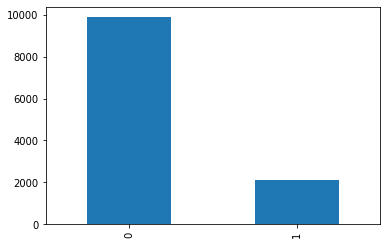

In [22]:
all_news['label'].value_counts().plot(kind='bar');

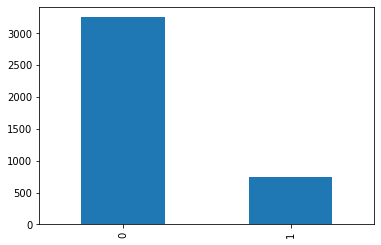

In [23]:
data['label'].value_counts().plot(kind='bar');

In [24]:
print(all_news.groupby('label').size().reset_index(name='count'))
print(data.groupby('label').size().reset_index(name='count'))

   label  count
0      0   9869
1      1   2131
   label  count
0      0   3252
1      1    748


In [25]:
# 11팀 태윤님이 보내주신 코랩(https://colab.research.google.com/drive/1kZS2IO8Rs8LTG22kNJiB4dvCn5gltpkH?usp=sharing)에서 2020-2022 전체 기간부분인 stopwords 가져왔습니다.
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '및', '그', '방법', '년부터', 
              '하는','그','등','및','제','과','더',"일","에","로",'위한',"월",'출시','개최',
             "년","것","억","반려동물","반려동물과","첫","만","for","and","the","a","in","of"]

In [26]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 819 kB/s 
     |████████████████████████████████| 465 kB 75.2 MB/s 


In [27]:
import konlpy
from konlpy.tag import Okt

okt = Okt()

X_train = []
for sentence in all_news['0']: # 전체기사데이터
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_train.append(temp_X)
  
X_test = []
for sentence in data['0']: # 2020기사데이터
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_test.append(temp_X)

In [28]:
from keras.preprocessing.text import Tokenizer

max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [29]:
# 중복 데이터라서 같게 나옵니다.

In [30]:
print(X_train[:10]) 

[[702, 1, 13, 79, 2, 175, 1419, 2, 70], [540, 84, 5151, 10, 2151, 1975, 348, 2335, 2555, 2336, 1223, 191], [15, 528, 52, 4231, 2337], [18, 235, 195, 1, 23, 76, 1717, 21, 22], [4, 382, 5, 349, 277, 30, 3, 438, 25, 191, 514, 53, 4232, 3], [5152, 6729, 349, 1976, 7, 4233, 2823, 1279, 2556, 108, 555, 333], [52, 1839, 21, 1420, 439, 3620, 1, 2557, 35, 168, 1128, 236], [406, 84, 471, 125, 2824, 737, 72, 572, 30], [4, 1977, 1341, 2152, 5, 5153, 5154], [3158, 1, 20, 14, 3159, 10, 4234, 10, 5155, 1514, 271]]


In [31]:
print(X_test[:10])

[[702, 1, 13, 79, 2, 175, 1419, 2, 70], [540, 84, 5151, 10, 2151, 1975, 348, 2335, 2555, 2336, 1223, 191], [15, 528, 52, 4231, 2337], [18, 235, 195, 1, 23, 76, 1717, 21, 22], [4, 382, 5, 349, 277, 30, 3, 438, 25, 191, 514, 53, 4232, 3], [5152, 6729, 349, 1976, 7, 4233, 2823, 1279, 2556, 108, 555, 333], [52, 1839, 21, 1420, 439, 3620, 1, 2557, 35, 168, 1128, 236], [406, 84, 471, 125, 2824, 737, 72, 572, 30], [4, 1977, 1341, 2152, 5, 5153, 5154], [3158, 1, 20, 14, 3159, 10, 4234, 10, 5155, 1514, 271]]


제목의 최대 길이 :  24
제목의 평균 길이 :  11.3515


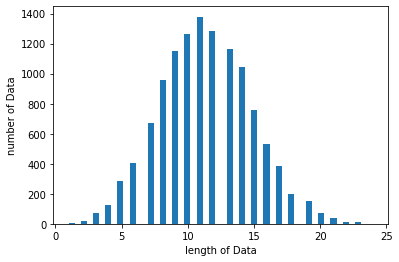

In [32]:
print("제목의 최대 길이 : ", max(len(l) for l in X_train))
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

제목의 최대 길이 :  23
제목의 평균 길이 :  11.39525


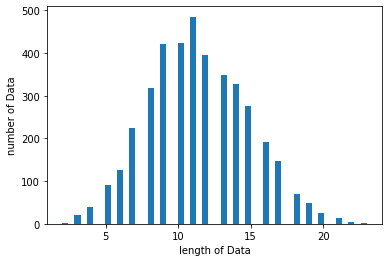

In [33]:
print("제목의 최대 길이 : ", max(len(l) for l in X_test))
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [34]:
import numpy as np

y_train = []
y_test = []

for i in range(len(all_news['label'])):
  if all_news['label'].iloc[i] == 1:
    y_train.append([0, 1])
  elif all_news['label'].iloc[i] == 0:
    y_train.append([1, 0])

for i in range(len(data['label'])):
  if data['label'].iloc[i] == 1:
    y_test.append([0, 1])
  elif data['label'].iloc[i] == 0:
    y_test.append([1, 0])

y_train = np.array(y_train)
y_test = np.array(y_test)

In [35]:
y_train

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [36]:
y_test

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [37]:
! pip install pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pad-sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10216 sha256=d26d3a029b064f442e7b43691280bd4895e7d9480b159e1058c3c57cc755c876
  Stored in directory: /root/.cache/pip/wheels/51/e4/5c/d3610ed4476515e540ff4096e3e9a8a3e701dedfe1072eb000
Successfully built pad-sequences


In [38]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 20    # 전체 데이터의 길이20

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [39]:
X_train.shape

(12000, 20)

In [40]:
X_test.shape

(4000, 20)

In [41]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_split=0.2)
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2) 

Epoch 1/10
960/960 [==============================] - 55s 55ms/step - loss: 0.4133 - accuracy: 0.8416 - val_loss: 0.4060 - val_accuracy: 0.8558
Epoch 2/10
960/960 [==============================] - 38s 39ms/step - loss: 0.2640 - accuracy: 0.8950 - val_loss: 0.4575 - val_accuracy: 0.8333
Epoch 3/10
960/960 [==============================] - 40s 41ms/step - loss: 0.1753 - accuracy: 0.9311 - val_loss: 0.5779 - val_accuracy: 0.8167
Epoch 4/10
960/960 [==============================] - 38s 39ms/step - loss: 0.1300 - accuracy: 0.9421 - val_loss: 0.6288 - val_accuracy: 0.8000
Epoch 5/10
960/960 [==============================] - 39s 40ms/step - loss: 0.1039 - accuracy: 0.9536 - val_loss: 0.8131 - val_accuracy: 0.8125
Epoch 6/10
960/960 [==============================] - 37s 38ms/step - loss: 0.0843 - accuracy: 0.9595 - val_loss: 0.9583 - val_accuracy: 0.7892
Epoch 7/10
960/960 [==============================] - 37s 38ms/step - loss: 0.0754 - accuracy: 0.9608 - val_loss: 0.8767 - val_accuracy:

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         3500000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 3,617,506
Trainable params: 3,617,506
Non-trainable params: 0
_________________________________________________________________


In [48]:
# print("\n accuracy : {:.3f}".format(model.evaluate(X_test,y_test)[1]*100)) # 중복된 데이터라서 그런가..

In [44]:
predict = model.predict(X_test)

125/125 [==============================] - 2s 13ms/step


In [45]:
import numpy as np
predict_labels = np.argmax(predict, axis=1)
original_labels = np.argmax(y_test, axis=1)

In [49]:
for i in range(50):
  print("반려동물 기사 : ", data['0'].iloc[i], "/\t 기존: ", original_labels[i], "/\t예측: ", predict_labels[i])

반려동물 기사 :  은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영 /	 기존:  0 /	예측:  0
반려동물 기사 :  새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다 /	 기존:  0 /	예측:  0
반려동물 기사 :  반려식물로 코로나 우울 해소 /	 기존:  1 /	예측:  1
반려동물 기사 :  “우리 아이와 반려동물, 함께 생활해도 괜찮을까?” /	 기존:  1 /	예측:  1
반려동물 기사 :  [영상]반려동물 식품의 세계화 "정부지원 받아 글로벌기업으로 우뚝" /	 기존:  1 /	예측:  1
반려동물 기사 :  배스 사들여 반려동물식품 제조…빈집 고쳐 장기거주 사회주택 제공 /	 기존:  1 /	예측:  1
반려동물 기사 :  반려동물도 코로나블루? 쿠쿠전자 넬로, 팻케어 제품 수요 증가 /	 기존:  0 /	예측:  0
반려동물 기사 :  2021년부터 동물보호법 상 맹견은 책임보험 의무화 /	 기존:  1 /	예측:  1
반려동물 기사 :  [웰컴 투 펫팸] 반려동물도 쇼크로 쓰러진다 /	 기존:  0 /	예측:  0
반려동물 기사 :  지솔펫, 반려동물을 위한 살균·소독·향균 탈취제 선보여 /	 기존:  0 /	예측:  0
반려동물 기사 :  [펫 닥터] 아이센텀동물메디컬센터-반려동물 녹내장 /	 기존:  0 /	예측:  0
반려동물 기사 :  '2020 대한민국 반려동물 산업대상'...12개 기업 선정 /	 기존:  0 /	예측:  0
반려동물 기사 :  [펫플스토리] 반려동물 복지 향한 ‘펫로스케어’의 남다른 행보 /	 기존:  0 /	예측:  0
반려동물 기사 :  2021년부터 동물보호법 상 맹견은 책임보험 의무화 /	 기존:  1 /	예측:  1
반려동물 기사 :  [기자수첩] 코로나가 불러온 동물입양 붐 /	 기존:  1 /	예측:  1
반려동물 기사 :  [웰컴 투 펫팸] 반려동물도 쇼크로 쓰러진다 /	 기존:  0 /	예측:  0
반려동물 기사 :  [상생협력]펫티켓으로 인간과 반려동물의 공존을 모색하는 ㈜프로젝